In [611]:
import os
import sys
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from copy import deepcopy
import numpy as np
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from statsmodels.distributions.empirical_distribution import ECDF

In [244]:
# Now for some cross-sectional associations
#cs = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')
cs = pandas.read_csv('/Users/jakevogel/Science/tau/braak_stage_rois.csv',index_col=0)
#cs.columns[-60:]
#cs.columns[-69:]
cs=cs[cs.visit==1]
cs.head()


,subject,visit,data_driven_1,data_driven_2,data_driven_3,data_driven_4,data_driven_5,schwarz_roi1,schwarz_stage1,schwarz_roi2,...,ADAS13,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,FAQ,MOCA,EcogSPTotal,EcogPtTotal,ADNI_MEM,ADNI_EF
0,019_S_5242,1,0.916812,0.807799,1.036875,0.927068,0.940825,1.186313,1.186313,1.237032,...,2.0,29.0,58.0,7.14286,0.0,25.0,1.10256,1.07692,2.062,0.655
1,135_S_5269,1,0.861956,0.796927,1.028808,0.915993,0.976776,1.263180,1.263180,1.226887,...,6.0,27.0,47.0,36.36360,0.0,27.0,1.07692,1.02564,0.975,0.967
2,137_S_0722,1,1.029931,0.907257,0.878976,0.922716,1.018845,1.068030,1.068030,1.062264,...,NaN,NaN,22.0,100.00000,16.0,NaN,1.89744,1.58974,-0.172,0.239
3,135_S_4281,1,0.925973,0.857381,0.917609,0.991416,1.026486,0.948917,0.948917,1.128345,...,19.0,27.0,36.0,25.00000,0.0,25.0,1.87179,2.84615,0.261,0.368
4,137_S_0668,1,0.827416,0.773918,0.876734,0.928124,0.910101,1.234275,1.234275,1.114890,...,18.0,27.0,38.0,30.00000,0.0,24.0,1.28205,1.23077,0.304,0.483


In [246]:
#taucols = cs.columns[-60:].tolist()
taucols = cs.columns[2:42].tolist()
#taucols = cs.columns[19:].tolist()
taucols

['data_driven_1',
 'data_driven_2',
 'data_driven_3',
 'data_driven_4',
 'data_driven_5',
 'schwarz_roi1',
 'schwarz_stage1',
 'schwarz_roi2',
 'schwarz_stage2',
 'schwarz_roi3',
 'schwarz_stage3',
 'schwarz_roi4',
 'schwarz_stage4',
 'schwarz_roi5',
 'schwarz_stage5',
 'schwarz_roi6',
 'schwarz_stage6',
 'cho_roi1',
 'cho_stage1',
 'cho_roi2',
 'cho_stage2',
 'cho_roi3',
 'cho_stage3',
 'cho_roi4',
 'cho_stage4',
 'cho_roi5',
 'cho_stage5',
 'scholl_roi1',
 'scholl_stage1',
 'scholl_roi2',
 'scholl_stage2',
 'scholl_roi3',
 'scholl_stage3',
 'scholl_roi4',
 'scholl_stage4',
 'scholl_roi5',
 'scholl_stage5',
 'scholl_roi6',
 'scholl_stage6',
 'inferior_temporal']

In [11]:
cs.columns

Index(['subject', 'visit', 'data_driven_1', 'data_driven_2', 'data_driven_3',
       'data_driven_4', 'data_driven_5', 'schwarz_roi1', 'schwarz_stage1',
       'schwarz_roi2', 'schwarz_stage2', 'schwarz_roi3', 'schwarz_stage3',
       'schwarz_roi4', 'schwarz_stage4', 'schwarz_roi5', 'schwarz_stage5',
       'schwarz_roi6', 'schwarz_stage6', 'cho_roi1', 'cho_stage1', 'cho_roi2',
       'cho_stage2', 'cho_roi3', 'cho_stage3', 'cho_roi4', 'cho_stage4',
       'cho_roi5', 'cho_stage5', 'scholl_roi1', 'scholl_stage1', 'scholl_roi2',
       'scholl_stage2', 'scholl_roi3', 'scholl_stage3', 'scholl_roi4',
       'scholl_stage4', 'scholl_roi5', 'scholl_stage5', 'scholl_roi6',
       'scholl_stage6', 'inferior_temporal', 'DX_fill', 'av45_status', 'AGE',
       'PTGENDER', 'PTEDUCAT', 'APOE4', 'CDRSB', 'ADAS11', 'ADAS13', 'MMSE',
       'RAVLT_immediate', 'RAVLT_perc_forgetting', 'FAQ', 'MOCA',
       'EcogSPTotal', 'EcogPtTotal', 'ADNI_MEM', 'ADNI_EF'],
      dtype='object')

In [247]:
# Get data and nons
indvar = ['AGE','PTGENDER','PTEDUCAT']
pred_var = ['MMSE','ADNI_MEM','ADNI_EF','DX_fill','av45_status']
a_indata=cs[taucols+indvar+pred_var].dropna()

gend = a_indata.PTGENDER
gend[gend=='Male'] = 1
gend[gend=='Female'] = 2
a_indata.PTGENDER = gend
a_indata.shape



//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(178, 48)

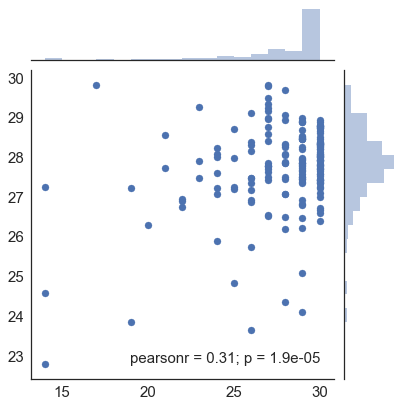

In [248]:
# one ROI
lr = linear_model.LinearRegression()
adni_xin = a_indata[taucols[2]].values.reshape(-1,1)
adni_y = a_indata['MMSE'].values

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, adni_xin, adni_y, cv=10)

plt.close()
sns.jointplot(adni_y,predicted)
plt.show()
#fig, ax = plt.subplots()
#ax.scatter(y, predicted)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
#plt.show()

In [249]:
## A FURTHER REMOVAL -- GET RID OF REDUNDANT VARIABLES AND THE ET3s
jnk = []
for col in taucols:
    if 'ET_3' not in col and 'stage1' not in col and 'Stage1' not in col:
        jnk.append(col)
ncols = jnk
ncols

['data_driven_1',
 'data_driven_2',
 'data_driven_3',
 'data_driven_4',
 'data_driven_5',
 'schwarz_roi1',
 'schwarz_roi2',
 'schwarz_stage2',
 'schwarz_roi3',
 'schwarz_stage3',
 'schwarz_roi4',
 'schwarz_stage4',
 'schwarz_roi5',
 'schwarz_stage5',
 'schwarz_roi6',
 'schwarz_stage6',
 'cho_roi1',
 'cho_roi2',
 'cho_stage2',
 'cho_roi3',
 'cho_stage3',
 'cho_roi4',
 'cho_stage4',
 'cho_roi5',
 'cho_stage5',
 'scholl_roi1',
 'scholl_roi2',
 'scholl_stage2',
 'scholl_roi3',
 'scholl_stage3',
 'scholl_roi4',
 'scholl_stage4',
 'scholl_roi5',
 'scholl_stage5',
 'scholl_roi6',
 'scholl_stage6',
 'inferior_temporal']

In [250]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
# First, run the lasso including covariates
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
cov_cols = ncols[:-6] + ['AGE','PTGENDER','PTEDUCAT']
clf = linear_model.LassoCV(max_iter=100000)
n_xin = a_indata[ncols].values
# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(n_xin, adni_y)
n_features = sfm.transform(n_xin).shape[1]
print('there are %s features'%(n_features))
while n_features > 6:
    sfm.threshold += 0.1
    X_transform = sfm.transform(n_xin)
    n_features = X_transform.shape[1]

there are 15 features


In [232]:
cs.columns[7:19]

Index(['CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate',
       'RAVLT_perc_forgetting', 'FAQ', 'MOCA', 'EcogSPTotal', 'EcogPtTotal',
       'ADNI_MEM', 'ADNI_EF'],
      dtype='object')

In [251]:
cog_cols = cs.columns[48:].tolist()
#cog_cols = cs.columns[7:19].tolist()

In [252]:
npreds = cog_cols + ['DX_fill']
npreds

['CDRSB',
 'ADAS11',
 'ADAS13',
 'MMSE',
 'RAVLT_immediate',
 'RAVLT_perc_forgetting',
 'FAQ',
 'MOCA',
 'EcogSPTotal',
 'EcogPtTotal',
 'ADNI_MEM',
 'ADNI_EF',
 'DX_fill']

In [253]:
jdf = cs[npreds+cov_cols[-3:]+ncols]

In [254]:
jdf.dropna().shape

(162, 53)

In [255]:
jdf.loc[[x for x in jdf.index if any(~pandas.notnull(jdf.loc[x].values))]].head()

,CDRSB,ADAS11,ADAS13,MMSE,RAVLT_immediate,RAVLT_perc_forgetting,FAQ,MOCA,EcogSPTotal,EcogPtTotal,...,scholl_stage2,scholl_roi3,scholl_stage3,scholl_roi4,scholl_stage4,scholl_roi5,scholl_stage5,scholl_roi6,scholl_stage6,inferior_temporal
2,2.0,NaN,NaN,NaN,22.0,100.0000,16.0,NaN,1.89744,1.58974,...,0.950738,0.968647,0.964014,0.831532,0.872672,0.881761,0.878780,0.887110,0.879868,0.748859
9,NaN,5.0,8.0,29.0,54.0,0.0000,0.0,26.0,1.05128,1.02632,...,0.858327,0.856338,0.856853,0.707463,0.753853,0.679861,0.704132,0.720069,0.706214,0.793260
12,0.5,7.0,NaN,30.0,21.0,100.0000,0.0,22.0,1.33333,1.87179,...,1.160344,1.002962,1.043676,0.840569,0.903640,0.860191,0.874444,0.917250,0.880035,0.850399
14,2.0,5.0,7.0,30.0,49.0,41.6667,0.0,NaN,1.23077,1.20513,...,1.204508,1.132696,1.151273,0.911213,0.985760,0.896800,0.925981,0.926088,0.925995,0.922045
22,NaN,9.0,11.0,29.0,NaN,NaN,0.0,NaN,NaN,NaN,...,1.070543,1.001206,1.019143,0.905697,0.940925,0.893310,0.908929,0.922111,0.910651,0.919905


In [256]:
# A real quick check of the linear relationships since adding Lund ROIs
lin_res = pandas.DataFrame(index=ncols)
for dv in npreds[:-1]:
    if dv in jdf.columns:
        print('working on',dv)
    else:
        continue
    dat = jdf[(ncols+[dv]+cov_cols[-3:])].dropna()
    for col in ncols:
        mod = smf.ols('%s ~ %s + %s + %s + %s'%(dv,cov_cols[-3],
                                               cov_cols[-2],
                                               cov_cols[-1],col),
                                              data=dat).fit()
        lin_res.ix[col,'%s_t'%(dv)] = mod.tvalues[-1]
        lin_res.ix[col,'%s_p'%(dv)] = mod.pvalues[-1]
        lin_res.ix[col,'%s_beta'%(dv)] = mod.params[-1]
        lin_res.ix[col,'%s_se'%(dv)] = mod.bse[-1]
        

working on CDRSB
working on ADAS11
working on ADAS13
working on MMSE
working on RAVLT_immediate
working on RAVLT_perc_forgetting
working on FAQ
working on MOCA
working on EcogSPTotal
working on EcogPtTotal
working on ADNI_MEM
working on ADNI_EF


In [257]:
lin_res.sort_values('CDRSB_t',ascending=False).head()

,CDRSB_t,CDRSB_p,CDRSB_beta,CDRSB_se,ADAS11_t,ADAS11_p,ADAS11_beta,ADAS11_se,ADAS13_t,ADAS13_p,...,EcogPtTotal_beta,EcogPtTotal_se,ADNI_MEM_t,ADNI_MEM_p,ADNI_MEM_beta,ADNI_MEM_se,ADNI_EF_t,ADNI_EF_p,ADNI_EF_beta,ADNI_EF_se
data_driven_4,6.245047,3.147416e-09,5.705705,0.913637,6.360646,1.644094e-09,18.914070,2.973608,6.104215,6.359425e-09,...,0.754796,0.282471,-3.672088,0.000316,-1.870403,0.509357,-5.238044,4.596408e-07,-2.296856,0.438495
scholl_roi5,5.757953,3.776332e-08,6.774537,1.176553,6.230448,3.266015e-09,23.610476,3.789531,6.035251,9.072746e-09,...,0.909124,0.359154,-3.479807,0.000628,-2.257710,0.648803,-5.393840,2.199392e-07,-2.988866,0.554126
cho_stage4,5.750447,3.919897e-08,6.749960,1.173815,6.176001,4.340960e-09,23.394303,3.787937,6.016998,9.963351e-09,...,0.954081,0.357767,-3.274617,0.001267,-2.128428,0.649978,-5.572490,9.282881e-08,-3.069211,0.550779
cho_roi4,5.729875,4.341298e-08,6.808610,1.188265,6.175052,4.362483e-09,23.644134,3.828977,5.982252,1.190166e-08,...,0.904010,0.362514,-3.363889,0.000937,-2.205890,0.655756,-5.358943,2.597442e-07,-2.999462,0.559712
cho_stage5,5.634847,6.936820e-08,6.810378,1.208618,6.027285,9.370232e-09,23.511494,3.900844,5.846950,2.363710e-08,...,0.938588,0.367452,-3.225788,0.001490,-2.151509,0.666972,-5.385306,2.290853e-07,-3.055210,0.567323


In [263]:
lin_res.sort_values('CDRSB_t',ascending=False)[[x for x in lin_res.columns if '_t' in x]].head()

,CDRSB_t,ADAS11_t,ADAS13_t,MMSE_t,RAVLT_immediate_t,RAVLT_perc_forgetting_t,FAQ_t,MOCA_t,EcogSPTotal_t,EcogPtTotal_t,ADNI_MEM_t,ADNI_EF_t
data_driven_4,6.245047,6.360646,6.104215,-6.395489,-4.641698,3.694227,6.562740,-6.922900,5.414157,2.672116,-3.672088,-5.238044
scholl_roi5,5.757953,6.230448,6.035251,-6.985026,-4.530188,3.755037,6.345836,-6.924434,5.003276,2.531293,-3.479807,-5.393840
cho_stage4,5.750447,6.176001,6.016998,-6.811806,-4.540427,3.828543,6.315707,-6.903925,4.959407,2.666763,-3.274617,-5.572490
cho_roi4,5.729875,6.175052,5.982252,-6.887039,-4.516942,3.803656,6.349138,-6.756196,5.047382,2.493720,-3.363889,-5.358943
cho_stage5,5.634847,6.027285,5.846950,-6.652765,-4.435419,3.758996,6.223850,-6.758935,4.912122,2.554318,-3.225788,-5.385306


In [61]:
lin_res.sort_index().index

Index(['cho_roi1', 'cho_roi2', 'cho_roi3', 'cho_roi4', 'cho_roi5',
       'cho_stage2', 'cho_stage3', 'cho_stage4', 'cho_stage5', 'data_driven_1',
       'data_driven_2', 'data_driven_3', 'data_driven_4', 'data_driven_5',
       'inferior_temporal', 'scholl_roi1', 'scholl_roi2', 'scholl_roi3',
       'scholl_roi4', 'scholl_roi5', 'scholl_roi6', 'scholl_stage2',
       'scholl_stage3', 'scholl_stage4', 'scholl_stage5', 'scholl_stage6',
       'schwarz_roi1', 'schwarz_roi2', 'schwarz_roi3', 'schwarz_roi4',
       'schwarz_roi5', 'schwarz_roi6', 'schwarz_stage2', 'schwarz_stage3',
       'schwarz_stage4', 'schwarz_stage5', 'schwarz_stage6'],
      dtype='object')

In [70]:
npreds

['CDRSB',
 'ADAS11',
 'ADAS13',
 'MMSE',
 'RAVLT_immediate',
 'RAVLT_perc_forgetting',
 'FAQ',
 'MOCA',
 'EcogSPTotal',
 'EcogPtTotal',
 'ADNI_MEM',
 'ADNI_EF',
 'DX_fill']

In [72]:
cogz

['CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'FAQ', 'MOCA', 'EcogSPTotal']

In [272]:
cogz = npreds[:4] + npreds[6:9]
#cogz = npreds[:-1]
cum_rank = pandas.DataFrame(index = lin_res.index, columns = cogz )
for cog in cogz:
    if cog == 'MMSE' or 'MOCA':
        jnk = lin_res.loc[lin_res.index[:]].sort_values('%s_t'%(cog),ascending=False)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']
    else:
        jnk = lin_res.loc[lin_res.index[:]].sort_values('%s_t'%(cog),ascending=True)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [273]:
abs_lin_res = abs(lin_res)
cogz = npreds[:4] + npreds[6:9]
#cogz = npreds[:-1]
abs_cum_rank = pandas.DataFrame(index = abs_lin_res.index, columns = cogz )
for cog in cogz:
    jnk = abs_lin_res.loc[abs_lin_res.index[:]].sort_values('%s_t'%(cog),ascending=True)
    jnk['rank'] = range(len(jnk.index))
    for roi in jnk.index:
        abs_cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [274]:
cum_rank.columns[:]

Index(['CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'FAQ', 'MOCA', 'EcogSPTotal'], dtype='object')

In [275]:
cum_rank['Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:]].sum(axis=1).sort_values(ascending=False)
#cum_rank['mean_Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
abs_cum_rank['Inverted Cumulative Rank'] = abs_cum_rank[abs_cum_rank.columns[:]].sum(axis=1).sort_values(ascending=False)

In [276]:
cum_rank['dIndex'] = cum_rank.index
abs_cum_rank['dIndex'] = abs_cum_rank.index

In [277]:
#cum_rank['Inverted Cumulative Rank'].sort_values()
abs_cum_rank['Inverted Cumulative Rank'].sort_values(ascending=False)

scholl_roi5          244.0
data_driven_4        243.0
cho_roi4             235.0
cho_stage4           235.0
cho_stage5           224.0
scholl_stage5        216.0
scholl_stage6        209.0
cho_roi3             195.0
schwarz_roi5         188.0
cho_stage3           184.0
schwarz_roi4         177.0
schwarz_stage5       171.0
scholl_roi4          155.0
scholl_stage4        153.0
schwarz_stage6       151.0
data_driven_3        148.0
inferior_temporal    147.0
schwarz_stage4       136.0
scholl_roi3          133.0
data_driven_2        117.0
cho_roi5             116.0
cho_roi2             112.0
scholl_roi6          109.0
scholl_stage3        105.0
cho_stage2            94.0
data_driven_5         80.0
schwarz_roi2          66.0
schwarz_stage3        65.0
schwarz_stage2        48.0
schwarz_roi3          45.0
scholl_stage2         41.0
cho_roi1              38.0
scholl_roi1           31.0
scholl_roi2           21.0
schwarz_roi6          20.0
schwarz_roi1          10.0
data_driven_1          0.0
N

In [279]:
#cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']
#abs_cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = abs_cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']

In [280]:
abs_cum_rank

,CDRSB,ADAS11,ADAS13,MMSE,FAQ,MOCA,EcogSPTotal,Inverted Cumulative Rank,dIndex
data_driven_1,0,0,0,0,0,0,0,0.0,data_driven_1
data_driven_2,12,18,16,28,13,18,12,117.0,data_driven_2
data_driven_3,19,23,21,21,22,21,21,148.0,data_driven_3
data_driven_4,36,36,36,29,36,34,36,243.0,data_driven_4
data_driven_5,11,11,11,12,11,11,13,80.0,data_driven_5
schwarz_roi1,1,1,1,1,3,1,2,10.0,schwarz_roi1
schwarz_roi2,9,10,10,10,7,10,10,66.0,schwarz_roi2
schwarz_stage2,6,8,8,5,6,7,8,48.0,schwarz_stage2
schwarz_roi3,8,6,7,7,4,8,5,45.0,schwarz_roi3
schwarz_stage3,10,9,9,9,10,9,9,65.0,schwarz_stage3


In [281]:
cum_rank['Study'] = ['Data-driven']*5 + ['Schwarz']*11 + ['Cho']*9 + ['Schöll']*11 + ['Other']
abs_cum_rank['Study'] = ['Data-driven']*5 + ['Schwarz']*11 + ['Cho']*9 + ['Schöll']*11 + ['Other']

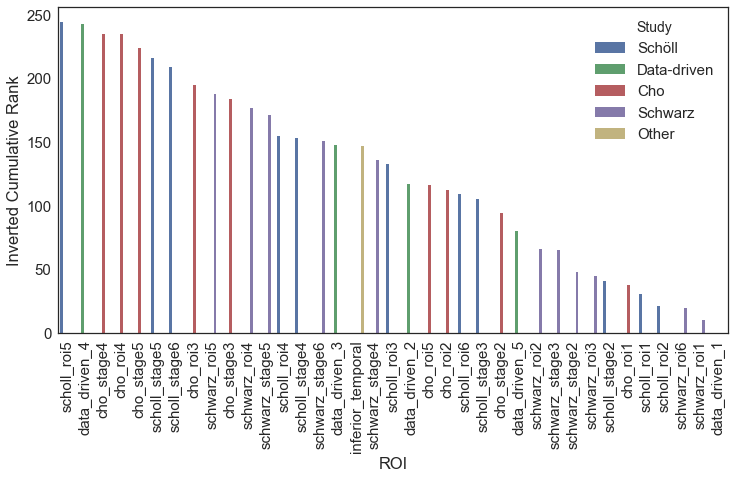

In [284]:
plt.close()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('white')
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.barplot(x='dIndex',y='Inverted Cumulative Rank',data=abs_cum_rank.sort_values('Inverted Cumulative Rank',
                                                                                    ascending=False),hue='Study')
plt.xlabel('ROI')
plt.ylabel('Inverted Cumulative Rank')
for item in fig.get_xticklabels():
    item.set_rotation(90)
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/absolute_rankings.pdf',bbox_inches='tight')
plt.show()

In [33]:
## REPEATING ANALYSIS WITH ONLY MCI, AMYLOID POSITIVE SUBJECTS

In [285]:
cs_AD = cs.loc[[x for x in cs.index if x not in cs[(cs.DX_fill=='MCI') & (cs.av45_status == 0)].index]]
jdf_AD = cs_AD[npreds+cov_cols[-3:]+ncols]
#jdf_AD = cs_AD[gcols]

In [286]:
# A real quick check of the linear relationships since adding Lund ROIs
lin_res_AD = pandas.DataFrame(index=ncols)
for dv in npreds[:-1]:
    if dv in jdf_AD.columns:
        print('working on',dv)
    else:
        continue
    dat = jdf_AD[(ncols+[dv]+cov_cols[-3:])].dropna()
    for col in ncols:
        mod = smf.ols('%s ~ %s + %s + %s + %s'%(dv,cov_cols[-3],
                                               cov_cols[-2],
                                               cov_cols[-1],col),
                                              data=dat).fit()
        lin_res_AD.ix[col,'%s_t'%(dv)] = mod.tvalues[-1]
        lin_res_AD.ix[col,'%s_p'%(dv)] = mod.pvalues[-1]
        

working on CDRSB
working on ADAS11
working on ADAS13
working on MMSE
working on RAVLT_immediate
working on RAVLT_perc_forgetting
working on FAQ
working on MOCA
working on EcogSPTotal
working on EcogPtTotal
working on ADNI_MEM
working on ADNI_EF


In [287]:
lin_res_AD.sort_values('ADAS13_t',ascending=False)

,CDRSB_t,CDRSB_p,ADAS11_t,ADAS11_p,ADAS13_t,ADAS13_p,MMSE_t,MMSE_p,RAVLT_immediate_t,RAVLT_immediate_p,...,MOCA_t,MOCA_p,EcogSPTotal_t,EcogSPTotal_p,EcogPtTotal_t,EcogPtTotal_p,ADNI_MEM_t,ADNI_MEM_p,ADNI_EF_t,ADNI_EF_p
data_driven_4,6.075627,1.167087e-08,6.425108,1.891196e-09,6.328035,3.091956e-09,-6.182069,6.339176e-09,-5.039999,0.000001,...,-7.011256,9.605734e-11,5.363703,3.408858e-07,2.987481,0.003326,-3.713095,0.000292,-5.482826,1.913675e-07
scholl_roi5,5.641026,9.417857e-08,6.321506,3.195455e-09,6.283756,3.864241e-09,-6.706747,4.368221e-10,-4.804761,0.000004,...,-7.024183,8.972941e-11,5.008840,1.670204e-06,2.878522,0.004627,-3.470205,0.000687,-5.713219,6.474559e-08
cho_stage4,5.579426,1.257313e-07,6.239451,4.826135e-09,6.246535,4.657866e-09,-6.478809,1.415298e-09,-4.871009,0.000003,...,-7.005081,9.923372e-11,4.930644,2.349215e-06,3.003957,0.003162,-3.301817,0.001211,-5.949849,2.072463e-08
cho_roi4,5.613073,1.073978e-07,6.260732,4.337849e-09,6.228398,5.100646e-09,-6.581846,8.339398e-10,-4.824122,0.000004,...,-6.882147,1.891473e-10,5.059602,1.336035e-06,2.837612,0.005226,-3.380412,0.000932,-5.694381,7.081256e-08
cho_stage5,5.481419,1.983673e-07,6.106664,9.349088e-09,6.087327,1.028759e-08,-6.355772,2.647007e-09,-4.775638,0.000004,...,-6.895326,1.765523e-10,4.878045,2.949552e-06,2.879925,0.004608,-3.280831,0.001298,-5.795052,4.379131e-08
scholl_stage5,5.414513,2.700736e-07,6.047337,1.253157e-08,6.034870,1.332473e-08,-6.294160,3.613337e-09,-4.698596,0.000006,...,-6.761029,3.553068e-10,4.730773,5.531970e-06,2.938482,0.003863,-3.141030,0.002044,-5.859421,3.212612e-08
scholl_stage6,5.339649,3.804405e-07,5.943013,2.089817e-08,5.908070,2.477564e-08,-6.198042,5.853115e-09,-4.627260,0.000008,...,-6.684732,5.271388e-10,4.703167,6.215512e-06,2.826890,0.005394,-3.138976,0.002057,-5.721383,6.227726e-08
cho_roi3,4.958834,2.078172e-06,5.701142,6.710290e-08,5.825269,3.700104e-08,-5.719949,6.068799e-08,-4.469919,0.000016,...,-7.063423,7.293707e-11,4.005504,1.013725e-04,3.346307,0.001053,-2.763070,0.006474,-6.051380,1.261405e-08
schwarz_roi5,4.985333,1.851225e-06,5.847657,3.320867e-08,5.724427,6.004627e-08,-6.199931,5.798112e-09,-4.360309,0.000025,...,-6.147751,7.953489e-09,3.712038,2.989051e-04,2.168944,0.031788,-2.476309,0.014433,-4.797482,4.090199e-06
cho_stage3,4.833226,3.576353e-06,5.442188,2.268144e-07,5.577270,1.206556e-07,-5.384294,2.938502e-07,-4.502154,0.000014,...,-6.552569,1.038745e-09,3.962429,1.192365e-04,3.311407,0.001183,-2.693050,0.007920,-6.142909,8.031544e-09


In [41]:
lin_res_AD.sort_index(inplace=True)
newind = lin_res_AD.index[:5].tolist() + ['C1. Subcortical','C2. Frontal','C3. Temporal','C4. Temporo-parietal', 'C5. Sensory '
                ] + ['Schöll_Single_%s'%x for x in range(1,7)] + ['Schöll_Stage_%s'%x for x in range(2,7)
                ] + ['Cho_Single_1'] + ['Cho_Single_%s'%x for x in range(3,7)] + ['Cho_Stage_%s'%x for x in range(3,7)
                ] + ['Inferior_Temporal'] + ['Lund_ET_%s'%x for x in range(1,7)
                                            ] + ['Schwarz_Single_%s'%x for x in range(1,7)] 
lin_res_AD.index = newind




In [42]:
#for col in lin_res_AD.index[-12:-6]:
#    lin_res_AD.drop(col,axis=0,inplace=True)

In [288]:
cogz = npreds[:4] + npreds[6:9]
cum_rank = pandas.DataFrame(index = lin_res_AD.index, columns = cogz )
for cog in cogz:
    if cog == 'MMSE' or 'MOCA':
        jnk = lin_res_AD.loc[lin_res_AD.index[:]].sort_values('%s_t'%(cog),ascending=False)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']
    else:
        jnk = lin_res_AD.loc[lin_res_AD.index[:]].sort_values('%s_t'%(cog),ascending=True)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [289]:
abs_lin_res_AD = abs(lin_res_AD)
cogz = npreds[:4] + npreds[6:9]
abs_cum_rank = pandas.DataFrame(index = abs_lin_res_AD.index, columns = cogz )
for cog in cogz:
    jnk = abs_lin_res_AD.loc[abs_lin_res_AD.index[:]].sort_values('%s_t'%(cog),ascending=True)
    jnk['rank'] = range(len(jnk.index))
    for roi in jnk.index:
        abs_cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [290]:
cum_rank['Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:]].sum(axis=1).sort_values(ascending=False)
#cum_rank['mean_Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
abs_cum_rank['Inverted Cumulative Rank'] = abs_cum_rank[abs_cum_rank.columns[:]].sum(axis=1).sort_values(ascending=False)
cum_rank['dIndex'] = cum_rank.index
abs_cum_rank['dIndex'] = abs_cum_rank.index
cum_rank['Inverted Cumulative Rank'].sort_values(ascending=False)
abs_cum_rank['Inverted Cumulative Rank'].sort_values(ascending=False)

scholl_roi5          244.0
data_driven_4        243.0
cho_roi4             237.0
cho_stage4           233.0
cho_stage5           225.0
scholl_stage5        217.0
scholl_stage6        209.0
cho_roi3             193.0
schwarz_roi5         188.0
cho_stage3           179.0
schwarz_roi4         170.0
schwarz_stage5       168.0
scholl_roi4          159.0
scholl_stage4        155.0
schwarz_stage6       152.0
data_driven_3        150.0
inferior_temporal    147.0
scholl_roi3          139.0
cho_roi5             130.0
schwarz_stage4       126.0
scholl_roi6          123.0
data_driven_2        120.0
scholl_stage3        104.0
cho_roi2             101.0
data_driven_5         83.0
cho_stage2            82.0
schwarz_stage3        63.0
schwarz_roi2          63.0
schwarz_roi3          53.0
schwarz_stage2        47.0
cho_roi1              39.0
scholl_stage2         38.0
scholl_roi1           32.0
schwarz_roi6          25.0
scholl_roi2           17.0
schwarz_roi1           7.0
data_driven_1          1.0
N

In [291]:
cum_rank['Study'] = ['Data-driven']*5 + ['Schwarz']*11 + ['Cho']*9 + ['Schöll']*11 + ['Other']
abs_cum_rank['Study'] = ['Data-driven']*5 + ['Schwarz']*11 + ['Cho']*9 + ['Schöll']*11 + ['Other']

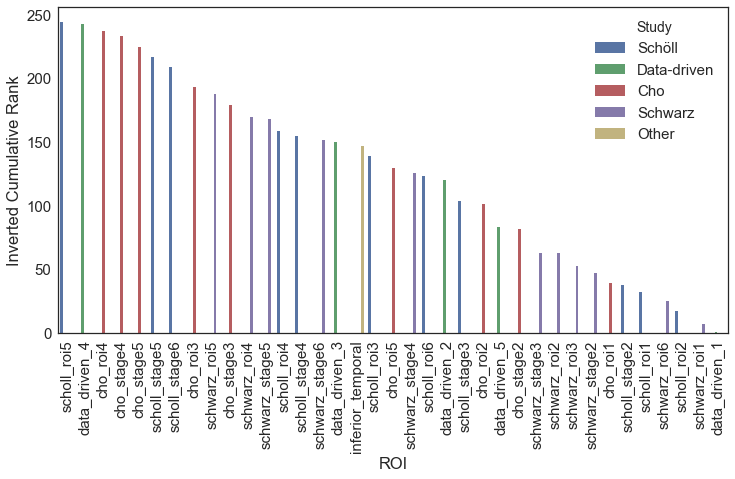

In [292]:
plt.close()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('white')
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.barplot(x='dIndex',y='Inverted Cumulative Rank',data=abs_cum_rank.sort_values('Inverted Cumulative Rank',
                                                                                    ascending=False),hue='Study')
plt.xlabel('ROI')
plt.ylabel('Inverted Cumulative Rank')
for item in fig.get_xticklabels():
    item.set_rotation(90)
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/rankings_only_MCIpos.pdf')
plt.show()

In [293]:
jnk = deepcopy(a_indata)
jnk.ix[:,'sumx'] = jnk[ncols].sum(axis=1)
n_indata = deepcopy(a_indata)
bcols = [x for x in ncols if 'age_1' not in x]


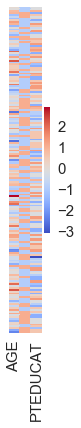

In [195]:
plt.close()
jnk1 = jnk[cov_cols[-3:]]
jnk1 = (jnk1-np.mean(jnk1))/np.std(jnk1)
fig, ax = plt.subplots(figsize=(.75,6))
fig = sns.heatmap(jnk1.loc[jnk.sort_values('sumx').index].astype(float),
            yticklabels=False,cmap="coolwarm")
#junk = fig.get_figure()
#junk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/cov_features.pdf',
#           bbox_inches='tight')
plt.show()

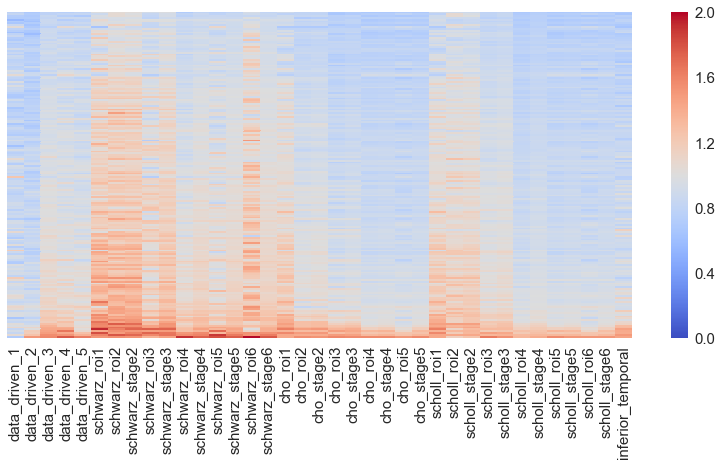

In [299]:
plt.close()
fig,ax = plt.subplots(1,figsize=(14,6))
fig = sns.heatmap(n_indata.loc[jnk.sort_values('sumx').index][bcols],
            yticklabels=False,cmap="coolwarm",vmin=0,vmax=2)
#jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/features.pdf',
#            bbox_inches='tight')
plt.show()

In [300]:
def lasso_feat_select(indata, xcols, ycol, cv = False, folds = 10,
                      thr = 0.25, delt = 0.1, max_feat = 6, scale=False,
                      clf = linear_model.LassoCV(max_iter=100000,cv=10),
                      plt_min = 0, plt_max = 100, mod_predict = False
                     ):
    
    if cv == False:
        clf = clf
        n_x = indata[xcols].dropna()
        n_y = indata.loc[n_x.index][ycol].dropna()
        n_yin = n_y.values
        n_x = n_x.loc[n_y.index]
        n_xin = n_x.values
        if scale:
            s_tfm = StandardScaler().fit(n_xin)
            n_xin = s_tfm.transform(n_xin)
        # Set a minimum threshold of 0.25
        las = clf.fit(n_xin,n_yin)
        if mod_predict:
            acc = las.score(n_xin,n_yin)
            print('prediction accuracy = ',acc)
        sfm = SelectFromModel(clf, threshold=thr)
        sfm.fit(n_xin, n_yin)
        n_features = sfm.transform(n_xin).shape[1]
        print('there are %s features'%(n_features))
        while n_features > max_feat:
            sfm.threshold += delt
            X_transform = sfm.transform(n_xin)
            n_features = X_transform.shape[1]
        
        selected = []
        if scale:
            n_xin = s_tfm.inverse_transform(n_xin)
        newx = sfm.transform(n_xin)
        print('selected = ',newx.shape[-1])
        for i in range(newx.shape[-1]):
            arr = newx[:,i]
            for col in xcols:
                if np.allclose(indata.loc[n_x.index][col].values,arr):
                    selected.append(col)
        
        try:
            print('model alpha selected =',clf.fit(n_xin, n_yin).alpha_)
            print("Computing regularization path using the coordinate descent lasso...")
            model = clf.fit(n_xin, n_yin)

            # Display results
            m_log_alphas = -np.log10(model.alphas_)
            #m_log_alphas = model.alphas_

            plt.close()
            fig = plt.figure()
            ymin, ymax = plt_min, plt_max
            plt.plot(m_log_alphas, model.mse_path_, ':')
            plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
                     label='Average across the folds', linewidth=2)
            plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
                        linewidth=2, label='alpha: CV estimate')
            #plt.axvline(model.alpha_, linestyle='--', color='k',
            #            linewidth=2, label='alpha: CV estimate')
            
            plt.legend()

            plt.xlabel('-log(alpha)')
            #plt.xlabel('alpha')
            plt.ylabel('Mean square error')
            plt.title('Mean square error on each fold')
            plt.axis('tight')
            plt.ylim(ymin, ymax)
            plt.show()
            return selected, fig, las
        except:
            return selected

    else:
        kf = KFold(n_splits=folds)
        selected = {}
        nfeats = []
        for train_index,test_index in kf.split(indata):
            clf = clf
            n_xin = indata[xcols].values[train_index]
            n_yin = indata[ycol].values[train_index]
            # Set a minimum threshold of 0.25
            sfm = SelectFromModel(clf, threshold=thr)
            sfm.fit(n_xin, n_yin)
            n_features = sfm.transform(n_xin).shape[1]
            print('there are %s features'%(n_features))
            while n_features > max_feat:
                sfm.threshold += delt
                X_transform = sfm.transform(n_xin)
                n_features = X_transform.shape[1]

            newx = sfm.transform(n_xin)
            scols = []
            print('selected = ',newx.shape[-1])
            nfeats.append(newx.shape[-1])
            for i in range(newx.shape[-1]):
                arr = newx[:,i]
                for col in xcols:
                    if np.allclose(indata[col].values[train_index],arr):
                        scols.append(col)
            for col in scols:
                if col in selected.keys():
                    selected.update({col: selected[col] + 1})
                else:
                    selected.update({col: 1})
            
        return selected,nfeats

In [301]:
code = dict(zip(jdf.PTGENDER.unique(),range(2)))
jdf.PTGENDER = [code[jdf.ix[x,'PTGENDER']] for x in jdf.index]
jdf.PTGENDER

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0      0
1      0
2      0
3      1
4      0
5      0
6      1
7      0
8      1
9      1
10     0
11     0
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     0
27     1
28     0
29     0
      ..
198    1
199    1
201    1
203    0
204    0
205    0
206    1
207    1
209    0
210    0
211    0
212    0
213    1
214    0
215    1
216    1
217    0
222    1
223    0
224    0
225    0
226    1
230    0
232    1
233    1
234    1
236    1
237    0
238    1
240    0
Name: PTGENDER, dtype: int64

prediction accuracy =  0.439496032696
there are 40 features
selected =  12
model alpha selected = 0.00400569171759
Computing regularization path using the coordinate descent lasso...


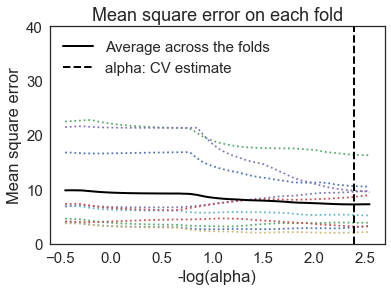

['data_driven_3',
 'schwarz_roi1',
 'schwarz_roi3',
 'schwarz_roi4',
 'schwarz_roi5',
 'cho_roi1',
 'scholl_roi1',
 'scholl_roi4',
 'scholl_roi5',
 'cho_roi5',
 'scholl_roi6',
 'inferior_temporal',
 'AGE',
 'PTEDUCAT']

In [302]:
selected,fig, las = lasso_feat_select(jdf,ncols+cov_cols[-3:],'MMSE',
                                      scale=True,plt_min=0,plt_max=40,mod_predict=True,
                                      thr=0, max_feat=12)
selected

In [303]:
eq = 'MMSE ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=jdf).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     11.30
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           1.70e-16
Time:                        15:47:42   Log-Likelihood:                -413.25
No. Observations:                 184   AIC:                             852.5
Df Residuals:                     171   BIC:                             894.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            29.6498      3.136      9.455      0.000      23.460      35.840
data_driven_3        -7.7831      7.279     -1.069      0.286     -22.152       6.586
schwarz_roi1         14.5759      3.593      4.056      0.000       7.483      21.669
schwarz_roi3          2.4149      1.928      1.253      0.212      -1.391       6.220
schwarz_roi4         -5.8715      3.192     -1.840      0.068     -12.172       0.429
schwarz_roi5         -3.5104      2.219     -1.582      0.116      -7.891       0.870
cho_roi1             -6.4928      2.516     -2.581      0.011     -11.459      -1.527
scholl_roi1          -6.4928      2.516     -2.581      0.011     -11.459      -1.527
scholl_roi4          27.3748      8.439      3.244      0.001      10.716      44.033
scholl_roi5         -23.7437      5.817     -4.081      0.000     -35.227     -12.260
cho_roi5              5.8835      2.251      2.613      0.010       1.439      10.328
scholl_roi6           5.8835      2.251      2.613      0.010       1.439      10.328
inferior_temporal    -7.1621      3.896     -1.838      0.068     -14.852       0.528
AGE                  -0.0335      0.028     -1.198      0.233      -0.089       0.022
PTEDUCAT              0.2814      0.070      4.035      0.000       0.144       0.419
==============================================================================
Omnibus:                       37.851   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.542
Skew:                          -1.111   Prob(JB):                     1.94e-13
Kurtosis:                       4.642   Cond. No.                     5.56e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
clus4_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_4 ~ brain_partition_core_ind_lund_sci5_scf5_1 + schwarz_atlas_6 + PTEDUCAT',
                     data=a_indata).fit().resid
scw6_resid = smf.ols(
    'schwarz_atlas_6 ~ brain_partition_core_ind_lund_sci5_scf5_4 + brain_partition_core_ind_lund_sci5_scf5_1',
                    data=a_indata).fit().resid
clus1_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_1 ~ brain_partition_core_ind_lund_sci5_scf5_4 + schwarz_atlas_6', 
                    data=a_indata).fit().resid

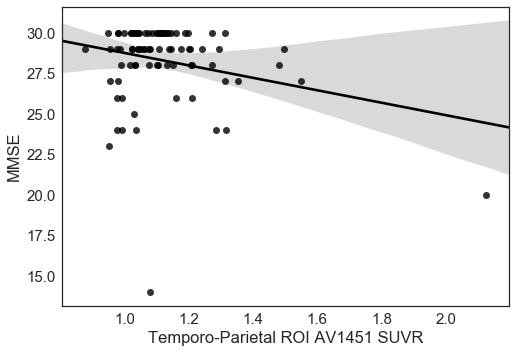

In [39]:
plt.close()
fig = sns.regplot(a_indata.brain_partition_consensus_ind_lund_sci5_scf5_4,adni_y,color='k')
fig.set(xlabel='Temporo-Parietal ROI AV1451 SUVR',ylabel='MMSE')
plt.show()

In [305]:
jdf1 = jdf[selected + ['MMSE']].dropna()
jdf1.columns

Index(['data_driven_3', 'schwarz_roi1', 'schwarz_roi3', 'schwarz_roi4',
       'schwarz_roi5', 'cho_roi1', 'scholl_roi1', 'scholl_roi4', 'scholl_roi5',
       'cho_roi5', 'scholl_roi6', 'inferior_temporal', 'AGE', 'PTEDUCAT',
       'MMSE'],
      dtype='object')

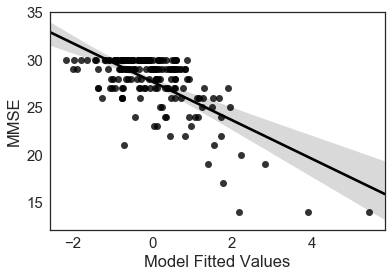

In [309]:
zfit = (lmod.fittedvalues - np.mean(lmod.fittedvalues)) / np.std(lmod.fittedvalues)
plt.close()
fig = sns.regplot((zfit*-1),jdf1['MMSE'].values,color='k')
fig.set(xlabel='Model Fitted Values',ylabel='MMSE')
#jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association_edu.pdf',
#            bbox_inches='tight')
plt.show()

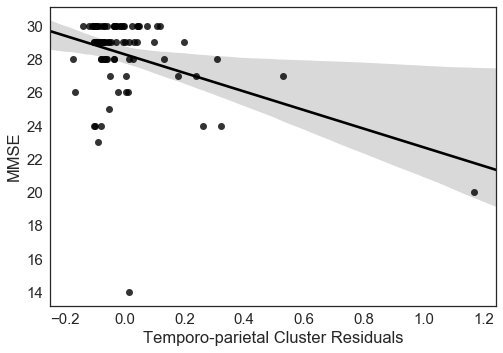

In [42]:
plt.close()
fig = sns.regplot(clus4_resid,a_indata['MMSE'].values,color='k')
fig.set(xlabel='Temporo-parietal Cluster Residuals',ylabel='MMSE')
jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association2_edu.pdf',
#            bbox_inches='tight')
plt.show()

In [71]:
### NOW AGAIN WITH ONLY THE MCI AMYLOID POSITIVE

In [310]:
code = dict(zip(jdf_AD.PTGENDER.unique(),range(2)))
jdf_AD.PTGENDER = [code[jdf_AD.ix[x,'PTGENDER']] for x in jdf_AD.index]
jdf_AD.PTGENDER

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0      0
1      0
4      0
6      1
9      1
15     1
16     0
17     1
18     1
20     1
21     0
22     0
23     0
24     0
30     1
31     0
32     1
33     0
35     1
36     0
40     0
41     1
48     0
53     1
54     1
58     1
62     0
64     1
66     0
67     0
      ..
198    1
199    1
201    1
203    0
204    0
205    0
206    1
207    1
209    0
210    0
211    0
212    0
213    1
214    0
215    1
216    1
217    0
222    1
223    0
224    0
225    0
226    1
230    0
232    1
233    1
234    1
236    1
237    0
238    1
240    0
Name: PTGENDER, dtype: int64

prediction accuracy =  0.472710537927
there are 40 features
selected =  12
model alpha selected = 0.00270241708198
Computing regularization path using the coordinate descent lasso...


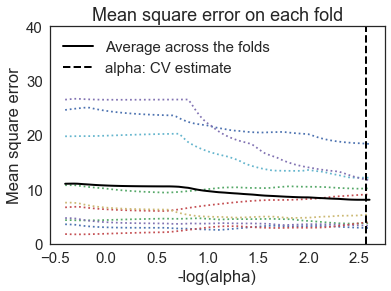

['data_driven_3',
 'schwarz_roi1',
 'schwarz_roi3',
 'schwarz_roi4',
 'schwarz_roi5',
 'cho_roi1',
 'scholl_roi1',
 'cho_roi5',
 'scholl_roi6',
 'cho_roi1',
 'scholl_roi1',
 'scholl_roi4',
 'scholl_roi5',
 'inferior_temporal',
 'PTEDUCAT']

In [311]:
selected,fig, las = lasso_feat_select(jdf_AD,ncols+cov_cols[-3:],'MMSE',
                                      scale=True,plt_min=0,plt_max=40,mod_predict=True,
                                      thr=0, max_feat=12)
selected

In [312]:
eq = 'MMSE ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=jdf_AD).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     10.95
Date:                Sun, 18 Mar 2018   Prob (F-statistic):           2.86e-14
Time:                        15:50:11   Log-Likelihood:                -334.69
No. Observations:                 147   AIC:                             693.4
Df Residuals:                     135   BIC:                             729.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            26.7731      2.479     10.800      0.000      21.870      31.676
data_driven_3       -14.0302      8.329     -1.685      0.094     -30.502       2.441
schwarz_roi1         15.7033      4.185      3.752      0.000       7.427      23.980
schwarz_roi3          2.7550      2.293      1.202      0.232      -1.779       7.289
schwarz_roi4         -3.2659      3.552     -0.919      0.360     -10.291       3.759
schwarz_roi5         -2.2975      2.532     -0.907      0.366      -7.306       2.711
cho_roi1             -6.8020      2.922     -2.328      0.021     -12.581      -1.022
scholl_roi1          -6.8020      2.922     -2.328      0.021     -12.581      -1.022
cho_roi5              5.2592      2.540      2.070      0.040       0.236      10.283
scholl_roi6           5.2592      2.540      2.070      0.040       0.236      10.283
scholl_roi4          34.6324     10.073      3.438      0.001      14.712      54.553
scholl_roi5         -27.5719      6.554     -4.207      0.000     -40.533     -14.610
inferior_temporal    -7.3118      4.394     -1.664      0.098     -16.001       1.378
PTEDUCAT              0.2921      0.084      3.473      0.001       0.126       0.458
==============================================================================
Omnibus:                       28.599   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.221
Skew:                          -1.060   Prob(JB):                     1.85e-09
Kurtosis:                       4.440   Cond. No.                     1.00e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.14e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
lmod.bse

Intercept                                    3.286841
schwarz_atlas_6                              2.519487
brain_partition_core_ind_lund_sci5_scf5_1    1.727733
brain_partition_core_ind_lund_sci5_scf5_4    1.509222
PTEDUCAT                                     0.109510
dtype: float64

In [77]:
clus4_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_4 ~ brain_partition_core_ind_lund_sci5_scf5_1 + schwarz_atlas_6 + PTEDUCAT',
                     data=jdf_AD).fit().resid
scw6_resid = smf.ols(
    'schwarz_atlas_6 ~ brain_partition_core_ind_lund_sci5_scf5_4 + brain_partition_core_ind_lund_sci5_scf5_1',
                    data=jdf_AD).fit().resid
clus1_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_1 ~ brain_partition_core_ind_lund_sci5_scf5_4 + schwarz_atlas_6', 
                    data=jdf_AD).fit().resid

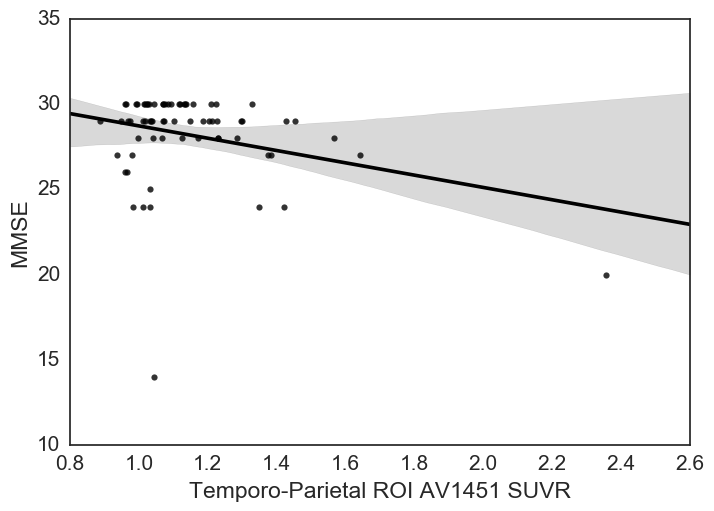

In [81]:
plt.close()
fig = sns.regplot(jdf_AD.brain_partition_core_ind_lund_sci5_scf5_4,jdf_AD.MMSE,color='k')
fig.set(xlabel='Temporo-Parietal ROI AV1451 SUVR',ylabel='MMSE')
plt.show()

In [313]:
jdf1_AD = jdf_AD[selected + ['MMSE']].dropna()
jdf1_AD.columns

Index(['data_driven_3', 'schwarz_roi1', 'schwarz_roi3', 'schwarz_roi4',
       'schwarz_roi5', 'cho_roi1', 'scholl_roi1', 'cho_roi5', 'scholl_roi6',
       'cho_roi1', 'scholl_roi1', 'scholl_roi4', 'scholl_roi5',
       'inferior_temporal', 'PTEDUCAT', 'MMSE'],
      dtype='object')

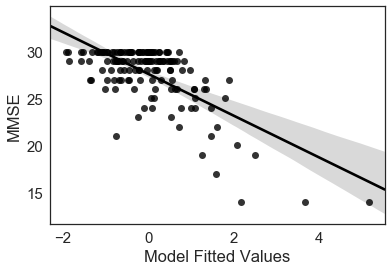

In [314]:
zfit = (lmod.fittedvalues - np.mean(lmod.fittedvalues)) / np.std(lmod.fittedvalues)
plt.close()
fig = sns.regplot((zfit*-1),jdf1_AD['MMSE'].values,color='k')
fig.set(xlabel='Model Fitted Values',ylabel='MMSE')
#jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association_edu.pdf',
#            bbox_inches='tight')
plt.show()

prediction accuracy =  0.283612836154
there are 40 features
selected =  8
model alpha selected = 0.00497081412752
Computing regularization path using the coordinate descent lasso...


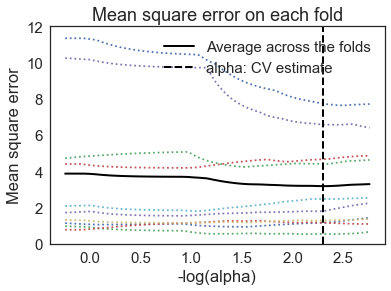

['data_driven_1',
 'data_driven_2',
 'data_driven_4',
 'schwarz_roi1',
 'schwarz_roi2',
 'AGE',
 'PTGENDER',
 'PTEDUCAT']

In [319]:
lasso_feat_select(jdf,ncols+cov_cols[-3:],'CDRSB',
                  scale=True,plt_min=0,plt_max=12,mod_predict=True,
                 thr=0, max_feat=12)[0]

prediction accuracy =  0.408831445416
there are 40 features
selected =  12
model alpha selected = 0.0221840132208
Computing regularization path using the coordinate descent lasso...


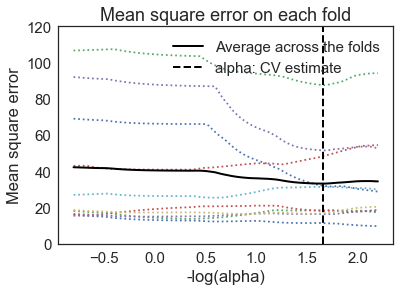

['data_driven_1',
 'data_driven_2',
 'schwarz_roi1',
 'schwarz_roi3',
 'schwarz_roi5',
 'cho_roi1',
 'scholl_roi1',
 'cho_roi4',
 'cho_roi5',
 'scholl_roi6',
 'scholl_stage2',
 'scholl_roi4',
 'inferior_temporal',
 'PTEDUCAT']

In [322]:
lasso_feat_select(jdf,ncols+cov_cols[-3:],'ADAS11',
                  scale=True,plt_min=0,plt_max=120, mod_predict=True,
                 thr=0, max_feat=12)[0]

prediction accuracy =  0.418541849719
there are 40 features
selected =  12
model alpha selected = 0.034181275264
Computing regularization path using the coordinate descent lasso...


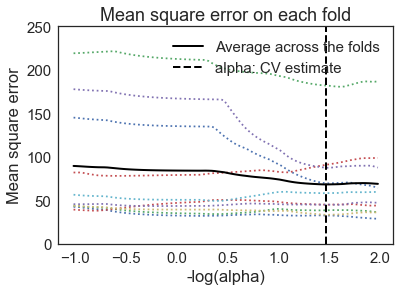

['data_driven_1',
 'data_driven_2',
 'schwarz_roi1',
 'schwarz_roi2',
 'schwarz_roi3',
 'schwarz_roi5',
 'cho_roi1',
 'scholl_roi1',
 'cho_roi4',
 'cho_roi5',
 'scholl_roi6',
 'scholl_roi4',
 'inferior_temporal',
 'PTEDUCAT']

In [324]:
lasso_feat_select(jdf,ncols+cov_cols[-3:],'ADAS13',scale=True,
                  plt_min=0,plt_max=250,mod_predict=True,
                 thr=0, max_feat=12)[0]

prediction accuracy =  0.342505126968
there are 71 features
selected =  12
model alpha selected = 0.00942643667723
Computing regularization path using the coordinate descent lasso...


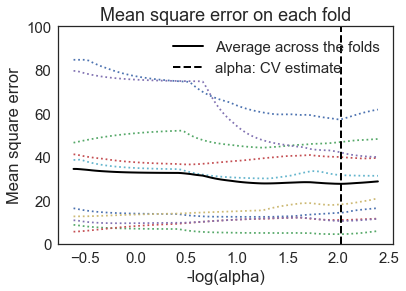

['data_driven_4',
 'data_driven_4',
 'schwarz_roi1',
 'schwarz_roi1',
 'schwarz_roi4',
 'schwarz_roi4',
 'cho_roi1',
 'scholl_roi1',
 'cho_roi1',
 'scholl_roi1',
 'scholl_roi4',
 'scholl_roi4',
 'scholl_roi5',
 'data_driven_5',
 'data_driven_5',
 'schwarz_roi1',
 'schwarz_roi1',
 'schwarz_roi4',
 'schwarz_roi4',
 'cho_roi1',
 'scholl_roi1',
 'cho_roi1',
 'scholl_roi1',
 'scholl_roi4',
 'scholl_roi4',
 'PTEDUCAT']

In [325]:
lasso_feat_select(jdf,ncols+cov_cols,'FAQ',scale=True,
                  plt_min=0,plt_max=100, mod_predict=True,
                 thr=0, max_feat=12)[0]

prediction accuracy =  0.322866181692
there are 40 features
selected =  8
model alpha selected = 0.00293800301637
Computing regularization path using the coordinate descent lasso...


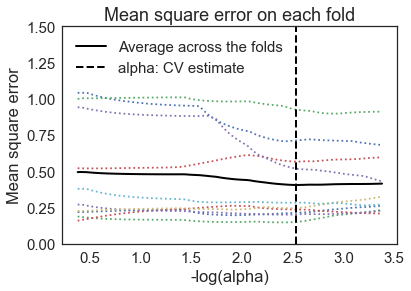

['data_driven_1',
 'data_driven_2',
 'data_driven_4',
 'schwarz_roi1',
 'cho_roi1',
 'scholl_roi1',
 'cho_roi4',
 'scholl_roi4',
 'PTEDUCAT']

In [327]:
lasso_feat_select(jdf,ncols+cov_cols[-3:],'EcogSPTotal',scale=True,
                  plt_min=0,plt_max=1.5,mod_predict=True,
                 thr=0, max_feat=12)[0]

prediction accuracy =  0.45790890664
there are 71 features
selected =  12
model alpha selected = 0.013634008683
Computing regularization path using the coordinate descent lasso...


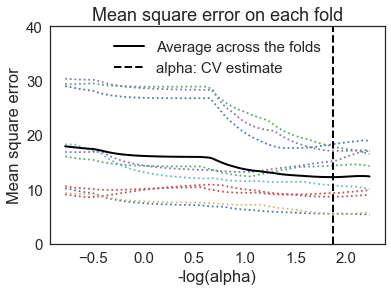

['schwarz_roi2',
 'schwarz_roi2',
 'schwarz_roi4',
 'schwarz_roi4',
 'cho_roi3',
 'cho_roi3',
 'scholl_roi4',
 'scholl_roi4',
 'scholl_roi5',
 'cho_roi5',
 'scholl_roi6',
 'cho_roi5',
 'inferior_temporal',
 'data_driven_2',
 'data_driven_2',
 'schwarz_roi1',
 'schwarz_roi1',
 'scholl_roi4',
 'scholl_roi4',
 'PTGENDER',
 'PTEDUCAT']

In [328]:
lasso_feat_select(jdf,ncols+cov_cols,'MOCA',scale=True,
                  plt_min=0,plt_max=40, mod_predict=True,
                 thr=0, max_feat=12)[0]

In [89]:
#### AND AGAIN WITH ONLY Amyloid POSITIVE MCI

prediction accuracy =  0.27460549461
there are 2 features
selected =  2
model alpha selected = 0.0135376534033
Computing regularization path using the coordinate descent lasso...


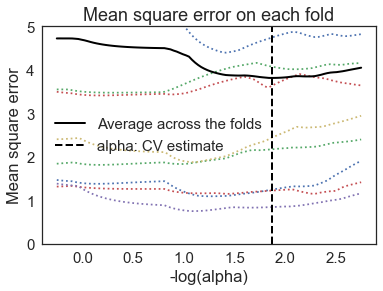

(['data_driven_4', 'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [214]:
lasso_feat_select(jdf_AD,ncols+cov_cols[-3:],'CDRSB',
                  scale=True,plt_min=0,plt_max=5,mod_predict=True)

prediction accuracy =  0.444272510997
there are 18 features
selected =  6
model alpha selected = 0.0322627067158
Computing regularization path using the coordinate descent lasso...


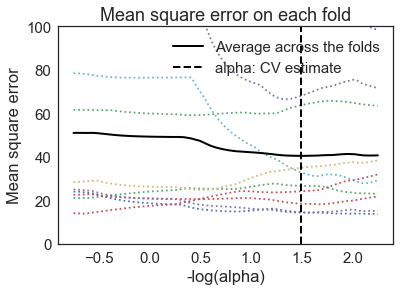

(['data_driven_2',
  'schwarz_roi1',
  'cho_roi1',
  'scholl_roi1',
  'cho_roi4',
  'scholl_roi4',
  'inferior_temporal'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [215]:
lasso_feat_select(jdf_AD,ncols+cov_cols[-3:],'ADAS11',
                  scale=True,plt_min=0,plt_max=100, mod_predict=True)

prediction accuracy =  0.45895486371
there are 17 features
selected =  6
model alpha selected = 0.00987706886846
Computing regularization path using the coordinate descent lasso...


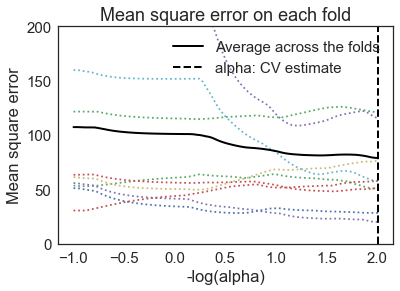

(['data_driven_2',
  'schwarz_roi1',
  'cho_roi1',
  'scholl_roi1',
  'cho_roi4',
  'scholl_roi4',
  'inferior_temporal'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [216]:
lasso_feat_select(jdf_AD,ncols+cov_cols[-3:],'ADAS13',scale=True,plt_min=0,plt_max=200,mod_predict=True)

prediction accuracy =  0.406235039319
there are 16 features
selected =  6
model alpha selected = 0.014244352025
Computing regularization path using the coordinate descent lasso...


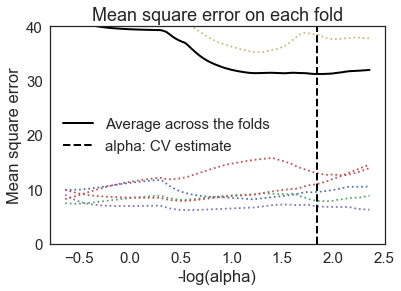

(['data_driven_4',
  'schwarz_roi1',
  'cho_roi1',
  'scholl_roi1',
  'cho_roi4',
  'scholl_roi4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [217]:
lasso_feat_select(jdf_AD,ncols+cov_cols[-3:],'FAQ',scale=True,plt_min=0,plt_max=40, mod_predict=True)

prediction accuracy =  0.376772506486
there are 5 features
selected =  5
model alpha selected = 0.00364090261965
Computing regularization path using the coordinate descent lasso...


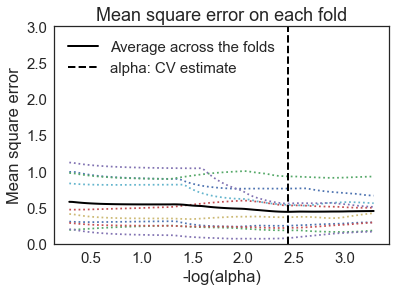

(['data_driven_4',
  'schwarz_roi1',
  'cho_roi1',
  'scholl_roi1',
  'cho_roi4',
  'scholl_roi4'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [218]:
lasso_feat_select(jdf_AD,ncols+cov_cols[-3:],'EcogSPTotal',scale=True,plt_min=0,plt_max=3,mod_predict=True)

prediction accuracy =  0.490289655533
there are 9 features
selected =  6
model alpha selected = 0.0182445743189
Computing regularization path using the coordinate descent lasso...


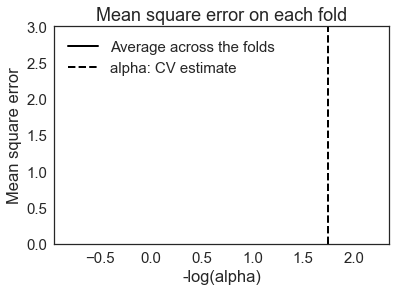

(['data_driven_1',
  'data_driven_2',
  'schwarz_roi1',
  'scholl_roi5',
  'inferior_temporal',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [219]:
lasso_feat_select(jdf_AD,ncols+cov_cols[-3:],'MOCA',scale=True,plt_min=0,plt_max=3,mod_predict=True)

# Stuff after revision

First true prediction

In [329]:
sys.path.insert(0,'/Users/jakevogel/git/hack_projects/')

import kfold_learning as kfl

In [398]:
from importlib import reload
reload(kfl)

<module 'kfold_learning' from '/Users/jakevogel/git/hack_projects/kfold_learning.py'>

In [364]:
tr_ind, te_ind = [],[]
for i in jdf1.sort_values(jdf1.columns[40],axis=0, ascending=True).index:
    if i in list(range(0,len(jdf1.index),3)):
        te_ind.append(i)
    else:
        tr_ind.append(i)
tr_ind = np.random.permutation(tr_ind)
te_ind = np.random.permutation(te_ind)

In [ ]:
tr_ind = np.random.permutation

In [356]:
jdf1 = jdf.dropna(axis=0)

In [394]:
train = jdf1.loc[tr_ind,ncols+cov_cols[-3:]]
test = jdf1.loc[te_ind,ncols+cov_cols[-3:]]
y = jdf1.loc[train.index,'MOCA']
t_y = jdf1.loc[test.index,'MOCA']
clf = linear_model.LassoCV(max_iter=100000)
output = kfl.kfold_feature_learning(train,test,y,t_y, folds=3, clf=clf)

running model for fold 1 of 3
running model for fold 2 of 3
running model for fold 3 of 3
13 features selected
validation prediction accuracy is 18.9352639739 percent 
 p = 4.9130164283e-07 
 r = 0.435146687611
testing prediction accuracy2 is 39.0662738494 percent 
 p = 1.1022918483e-14 
 r = 0.625030190066
testing prediction accuracy is 29.9163550374 percent 
 p = 0.000314580724896 
 r = 0.546958453975


In [392]:
list(zip(ncols+cov_cols[-3:],output[1]))

[('data_driven_1', 0.28532204803864475),
 ('data_driven_2', 0.0),
 ('data_driven_3', 0.0),
 ('data_driven_4', -0.56017775925247604),
 ('data_driven_5', 0.0),
 ('schwarz_roi1', 0.59985066293866851),
 ('schwarz_roi2', 0.0),
 ('schwarz_stage2', 0.0),
 ('schwarz_roi3', 0.0),
 ('schwarz_stage3', 0.0),
 ('schwarz_roi4', 0.0),
 ('schwarz_stage4', 0.0),
 ('schwarz_roi5', -0.511925967145204),
 ('schwarz_stage5', 0.0),
 ('schwarz_roi6', 0.0033908286676033049),
 ('schwarz_stage6', 0.0),
 ('cho_roi1', 0.0),
 ('cho_roi2', 0.0),
 ('cho_stage2', 0.0),
 ('cho_roi3', -0.53322233673833375),
 ('cho_stage3', 0.0),
 ('cho_roi4', 0.0),
 ('cho_stage4', 0.0),
 ('cho_roi5', -0.150383758679209),
 ('cho_stage5', 0.0),
 ('scholl_roi1', 0.0),
 ('scholl_roi2', 0.0),
 ('scholl_stage2', 0.0),
 ('scholl_roi3', -0.073889343676815669),
 ('scholl_stage3', 0.0),
 ('scholl_roi4', 0.0),
 ('scholl_stage4', 0.0),
 ('scholl_roi5', 0.0),
 ('scholl_stage5', 0.0),
 ('scholl_roi6', -1.3902517324561276e-15),
 ('scholl_stage6', 0.0)

Next, AUC/classification

In [375]:
jdf1.loc[:,'amyloid'] = cs.loc[jdf1.index,'av45_status'].values

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [378]:
tr_ind, te_ind = [],[]
for i in jdf1.sort_values('amyloid',axis=0, ascending=True).index:
    if i in list(range(0,len(jdf1.index),3)):
        te_ind.append(i)
    else:
        tr_ind.append(i)
tr_ind = np.random.permutation(tr_ind)
te_ind = np.random.permutation(te_ind)

In [383]:
from sklearn.ensemble import RandomForestClassifier

In [442]:
reload(kfl)

<module 'kfold_learning' from '/Users/jakevogel/git/hack_projects/kfold_learning.py'>

In [443]:
train = jdf1.loc[tr_ind,ncols+cov_cols[-3:]]
test = jdf1.loc[te_ind,ncols+cov_cols[-3:]]
y = jdf1.loc[train.index,'amyloid']
t_y = jdf1.loc[test.index,'amyloid']
#clf = RandomForestClassifier()
clf = SVC(C=1,kernel='linear',probability=True)
output = kfl.kfold_feature_learning(train,test,y,t_y, folds=10, problem='classification',
                                   clf=clf, output='heavy', vote='soft', weighted=True)

running model for fold 1 of 10
running model for fold 2 of 10
running model for fold 3 of 10
running model for fold 4 of 10
running model for fold 5 of 10
running model for fold 6 of 10
running model for fold 7 of 10
running model for fold 8 of 10
running model for fold 9 of 10
running model for fold 10 of 10
40 features selected
validation  sensitivity: 0.5806451612903226
validation specificity: 0.6721311475409836
validation accuracy: 0.6260162601626016
there are 2 ambiguous cases. Setting to hits...
ambiguous cases: [120, 111]
testing  sensitivity: 0.5454545454545454
testing specificity: 0.7857142857142857
testing accuracy: 0.717948717948718


In [446]:
for dx in jdf1.DX_fill.unique():
    jdf1.loc[:,'is_%s'%dx] = [1 if x==dx else 0 for x in jdf1.DX_fill.values]

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [413]:
output[1]

,Predicted,Actual,Prediction Function,Hit
0,0.0,1.0,-0.436953,0.0
1,0.0,0.0,NaN,1.0
2,0.0,0.0,NaN,1.0
3,0.0,0.0,-0.353995,1.0
4,0.0,1.0,NaN,0.0
5,0.0,0.0,NaN,1.0
6,0.0,0.0,-0.244451,1.0
7,1.0,1.0,NaN,1.0
8,0.0,1.0,NaN,0.0
9,0.0,0.0,NaN,1.0


In [483]:
tr_df = jdf1.loc[tr_ind]
te_df = jdf1.loc[te_ind]

In [485]:
train = tr_df[ncols+cov_cols[-3:]]
test = te_df[ncols+cov_cols[-3:]]
y = jdf1.loc[train.index,'is_Dementia']
t_y = jdf1.loc[test.index,'is_Dementia']
#clf = RandomForestClassifier()
clf = SVC(C=1,kernel='linear',probability=True)
output = kfl.kfold_feature_learning(train,test,y,t_y, folds=10, problem='classification',
                                   clf=clf, output='heavy', vote='soft', weighted=True)

running model for fold 1 of 10
running model for fold 2 of 10
running model for fold 3 of 10
running model for fold 4 of 10
running model for fold 5 of 10
running model for fold 6 of 10
running model for fold 7 of 10
running model for fold 8 of 10
running model for fold 9 of 10
running model for fold 10 of 10
40 features selected
validation  sensitivity: 0.15384615384615385
validation specificity: 0.9363636363636364
validation accuracy: 0.8536585365853658
testing  sensitivity: 0.0
testing specificity: 1.0
testing accuracy: 0.9487179487179487


In [495]:
train = tr_df[tr_df.is_NL!=1][ncols+cov_cols[-3:]]
test = te_df[te_df.is_NL!=1][ncols+cov_cols[-3:]]
y = jdf1.loc[train.index,'is_Dementia']
t_y = jdf1.loc[test.index,'is_Dementia']
#clf = RandomForestClassifier()
clf = SVC(C=1,kernel='linear',probability=True)
output = kfl.kfold_feature_learning(train,test,y,t_y, folds=10, problem='classification',
                                   clf=clf, output='heavy', vote='soft', weighted=True)

running model for fold 1 of 10
running model for fold 2 of 10
running model for fold 3 of 10
running model for fold 4 of 10
running model for fold 5 of 10
running model for fold 6 of 10
running model for fold 7 of 10
running model for fold 8 of 10
running model for fold 9 of 10
running model for fold 10 of 10
40 features selected
validation  sensitivity: 0.3076923076923077
validation specificity: 0.8679245283018868
validation accuracy: 0.7575757575757576
testing  sensitivity: 0.0
testing specificity: 0.8461538461538461
testing accuracy: 0.7333333333333333


In [471]:
jdf1.columns

Index(['CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate',
       'RAVLT_perc_forgetting', 'FAQ', 'MOCA', 'EcogSPTotal', 'EcogPtTotal',
       'ADNI_MEM', 'ADNI_EF', 'DX_fill', 'AGE', 'PTGENDER', 'PTEDUCAT',
       'data_driven_1', 'data_driven_2', 'data_driven_3', 'data_driven_4',
       'data_driven_5', 'schwarz_roi1', 'schwarz_roi2', 'schwarz_stage2',
       'schwarz_roi3', 'schwarz_stage3', 'schwarz_roi4', 'schwarz_stage4',
       'schwarz_roi5', 'schwarz_stage5', 'schwarz_roi6', 'schwarz_stage6',
       'cho_roi1', 'cho_roi2', 'cho_stage2', 'cho_roi3', 'cho_stage3',
       'cho_roi4', 'cho_stage4', 'cho_roi5', 'cho_stage5', 'scholl_roi1',
       'scholl_roi2', 'scholl_stage2', 'scholl_roi3', 'scholl_stage3',
       'scholl_roi4', 'scholl_stage4', 'scholl_roi5', 'scholl_stage5',
       'scholl_roi6', 'scholl_stage6', 'inferior_temporal', 'amyloid', 'is_NL',
       'is_MCI', 'is_Dementia'],
      dtype='object')

In [504]:
jnk=SVC(kernel='linear').fit(jdf1[jdf1.is_Dementia==0]['scholl_roi5'].values.reshape(-1,1),
              jdf1[jdf1.is_Dementia==0]['is_MCI'])

In [505]:
jnk.score(jdf1['scholl_roi5'].values.reshape(-1,1),jdf1['is_MCI'])

0.59259259259259256

In [506]:
jnk.predict(jdf1['scholl_roi5'].values.reshape(-1,1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [507]:
from itertools import cycle
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [515]:
label_binarize?

In [523]:
for i,row in jdf1.iterrows():
    dx = row['DX_fill']
    if dx == 'NL':
        jdf1.loc[i,'DX_num'] = 0
    elif dx == 'MCI':
        jdf1.loc[i,'DX_num'] = 1
    else:
        jdf1.loc[i,'DX_num'] = 2

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [524]:
jdf1.DX_num

0      0.0
1      0.0
3      1.0
4      0.0
5      1.0
6      0.0
7      1.0
8      1.0
10     1.0
11     1.0
13     1.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     0.0
21     0.0
23     0.0
24     0.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     0.0
31     0.0
32     0.0
33     0.0
34     1.0
      ... 
185    1.0
189    0.0
191    1.0
192    2.0
193    0.0
194    2.0
198    0.0
199    1.0
201    1.0
203    0.0
204    1.0
205    0.0
207    0.0
209    2.0
210    1.0
213    0.0
214    0.0
215    0.0
217    0.0
222    2.0
223    1.0
224    1.0
225    0.0
226    2.0
230    0.0
232    1.0
234    2.0
236    1.0
238    2.0
240    0.0
Name: DX_num, dtype: float64

In [522]:
list(zip(y,jdf1.DX_num))

[(array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 1, 0]), 1.0),
 (array([0, 0, 1]), 2.0),
 (array([0, 

In [568]:
X = jdf1[[ncols[0]]+cov_cols[-3:]]
y2 = jdf1['DX_num']

# Binarize the output
y = label_binarize(y2, classes=[0, 1, 2])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

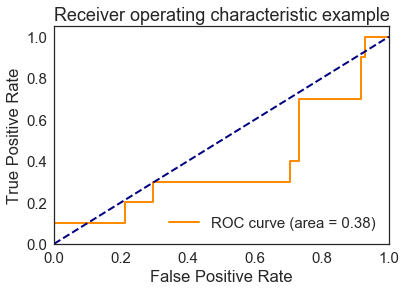

In [569]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [553]:
params1 = {'loss': ['hinge','log', 'modified_huber', 'squared_hinge', 'perceptron'],
          'penalty': ['none', 'l2', 'l1'],
          'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1]} 
params2 = {'loss': ['hinge','log', 'modified_huber', 'squared_hinge'],
          'penalty': ['elasticnet'],
          'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
          'l1_ratio': [0.05,0.1,0.15,0.2,0.3,0.5]} 

In [555]:
from sklearn.model_selection import GridSearchCV
selector = GridSearchCV(linear_model.SGDClassifier(random_state=123),[params1,params2],cv=10,
                                       scoring = 'f1')

In [595]:
for col in ncols:
    X = jdf1[[col]+cov_cols[-3:]]
    y2 = jdf1['DX_num']

    # Binarize the output
    y = label_binarize(y2, classes=[0, 1, 2])
    n_classes = y.shape[1]

    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                        random_state=0)

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(linear_model.logistic.LogisticRegressionCV())
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    print(col,'control: %0.2f, MCI: %0.2f, AD: %0.2f' %(roc_auc[0],roc_auc[1],roc_auc[2]))

data_driven_1 control: 0.48, MCI: 0.52, AD: 0.52
data_driven_2 control: 0.48, MCI: 0.52, AD: 0.75
data_driven_3 control: 0.48, MCI: 0.52, AD: 0.74
data_driven_4 control: 0.49, MCI: 0.52, AD: 0.74
data_driven_5 control: 0.49, MCI: 0.52, AD: 0.77
schwarz_roi1 control: 0.48, MCI: 0.52, AD: 0.53
schwarz_roi2 control: 0.55, MCI: 0.52, AD: 0.53
schwarz_stage2 control: 0.48, MCI: 0.52, AD: 0.53
schwarz_roi3 control: 0.48, MCI: 0.52, AD: 0.61
schwarz_stage3 control: 0.48, MCI: 0.52, AD: 0.63
schwarz_roi4 control: 0.56, MCI: 0.52, AD: 0.83
schwarz_stage4 control: 0.48, MCI: 0.52, AD: 0.80
schwarz_roi5 control: 0.48, MCI: 0.52, AD: 0.53
schwarz_stage5 control: 0.48, MCI: 0.52, AD: 0.79
schwarz_roi6 control: 0.49, MCI: 0.52, AD: 0.53
schwarz_stage6 control: 0.48, MCI: 0.52, AD: 0.81
cho_roi1 control: 0.48, MCI: 0.52, AD: 0.61
cho_roi2 control: 0.50, MCI: 0.52, AD: 0.73
cho_stage2 control: 0.51, MCI: 0.52, AD: 0.72
cho_roi3 control: 0.48, MCI: 0.52, AD: 0.73
cho_stage3 control: 0.48, MCI: 0.52, AD

In [585]:
roc_curve(y[:,i],y_score[:, i])

(array([ 0.        ,  0.00680272,  0.02040816,  0.02040816,  0.03401361,
         0.03401361,  0.10204082,  0.10204082,  0.11564626,  0.11564626,
         0.14285714,  0.14285714,  0.14965986,  0.14965986,  0.18367347,
         0.18367347,  0.26530612,  0.26530612,  0.3537415 ,  0.3537415 ,
         0.54421769,  0.54421769,  0.65306122,  0.65306122,  0.75510204,
         0.75510204,  0.78911565,  0.78911565,  0.93197279,  0.93197279,  1.        ]),
 array([ 0.        ,  0.        ,  0.        ,  0.06666667,  0.06666667,
         0.13333333,  0.13333333,  0.2       ,  0.2       ,  0.33333333,
         0.33333333,  0.4       ,  0.4       ,  0.46666667,  0.46666667,
         0.53333333,  0.53333333,  0.6       ,  0.6       ,  0.66666667,
         0.66666667,  0.73333333,  0.73333333,  0.8       ,  0.8       ,
         0.86666667,  0.86666667,  0.93333333,  0.93333333,  1.        ,  1.        ]),
 array([ 0.34090266, -0.65909734, -1.28351434, -1.28849799, -1.37475459,
        -1.40917025, 

In [586]:
for col in ncols:
    X = jdf1[[col]+cov_cols[-3:]]
    y2 = jdf1['DX_num']

    # Binarize the output
    y = label_binarize(y2, classes=[0, 1, 2])
    n_classes = y.shape[1]

    # Learn to predict each class against the other
    #classifier = OneVsRestClassifier(linear_model.logistic.LogisticRegression())
    classifier = OneVsRestClassifier(linear_model.logistic.LogisticRegression())
    y_score = classifier.fit(X, y).decision_function(X)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    print(col,'control: %0.2f, MCI: %0.2f, AD: %0.2f' %(roc_auc[0],roc_auc[1],roc_auc[2]))

data_driven_1 control: 0.56, MCI: 0.57, AD: 0.66
data_driven_2 control: 0.58, MCI: 0.58, AD: 0.74
data_driven_3 control: 0.60, MCI: 0.57, AD: 0.75
data_driven_4 control: 0.60, MCI: 0.57, AD: 0.77
data_driven_5 control: 0.58, MCI: 0.57, AD: 0.72
schwarz_roi1 control: 0.55, MCI: 0.59, AD: 0.69
schwarz_roi2 control: 0.61, MCI: 0.57, AD: 0.72
schwarz_stage2 control: 0.58, MCI: 0.57, AD: 0.71
schwarz_roi3 control: 0.58, MCI: 0.58, AD: 0.71
schwarz_stage3 control: 0.58, MCI: 0.57, AD: 0.71
schwarz_roi4 control: 0.62, MCI: 0.57, AD: 0.77
schwarz_stage4 control: 0.61, MCI: 0.57, AD: 0.76
schwarz_roi5 control: 0.59, MCI: 0.58, AD: 0.76
schwarz_stage5 control: 0.61, MCI: 0.57, AD: 0.76
schwarz_roi6 control: 0.59, MCI: 0.57, AD: 0.75
schwarz_stage6 control: 0.61, MCI: 0.57, AD: 0.76
cho_roi1 control: 0.56, MCI: 0.58, AD: 0.70
cho_roi2 control: 0.60, MCI: 0.57, AD: 0.74
cho_stage2 control: 0.60, MCI: 0.57, AD: 0.73
cho_roi3 control: 0.59, MCI: 0.57, AD: 0.76
cho_stage3 control: 0.60, MCI: 0.57, AD

In [ ]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [597]:
for col in ncols:
    X = jdf1.dropna()[[col]+cov_cols[-3:]]
    y = jdf1.dropna()['amyloid']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                        random_state=0)
    clf = RandomForestClassifier().fit(X_train,y_train)
    print(col,clf.score(X_test,y_test))
    

data_driven_1 0.571428571429
data_driven_2 0.591836734694
data_driven_3 0.612244897959
data_driven_4 0.551020408163
data_driven_5 0.530612244898
schwarz_roi1 0.65306122449
schwarz_roi2 0.571428571429
schwarz_stage2 0.571428571429
schwarz_roi3 0.632653061224
schwarz_stage3 0.591836734694
schwarz_roi4 0.591836734694
schwarz_stage4 0.612244897959
schwarz_roi5 0.65306122449
schwarz_stage5 0.632653061224
schwarz_roi6 0.551020408163
schwarz_stage6 0.530612244898
cho_roi1 0.612244897959
cho_roi2 0.612244897959
cho_stage2 0.530612244898
cho_roi3 0.591836734694
cho_stage3 0.632653061224
cho_roi4 0.571428571429
cho_stage4 0.591836734694
cho_roi5 0.428571428571
cho_stage5 0.448979591837
scholl_roi1 0.673469387755
scholl_roi2 0.469387755102
scholl_stage2 0.510204081633
scholl_roi3 0.632653061224
scholl_stage3 0.591836734694
scholl_roi4 0.673469387755
scholl_stage4 0.571428571429
scholl_roi5 0.510204081633
scholl_stage5 0.632653061224
scholl_roi6 0.469387755102
scholl_stage6 0.571428571429
inferior

# LATER ON ANALYSIS:
First, the subject-wise clustering

In [695]:
pcols = ['%s_positive'%x for x in ncols]
pdf = pandas.DataFrame(index = jdf.index, columns = ncols + pcols)

In [698]:
m1 = GaussianMixture(n_components=1,random_state=123)
m2 = GaussianMixture(n_components=2,random_state=123)
for col in ncols:
    bic1 = m1.fit(jdf[col].values.reshape(-1,1)).bic(jdf[col].values.reshape(-1,1))
    bic2 = m2.fit(jdf[col].values.reshape(-1,1)).bic(jdf[col].values.reshape(-1,1))
    if bic1 < bic2:
        pdf.loc[:,col] = ECDF(jdf[col].values)(jdf[col].values)
    else:
        labs = m2.fit(jdf[col].values.reshape(-1,1)
                               ).predict(jdf[col].values.reshape(-1,1))
        l1 = np.array(jdf[col])[labs==0].mean()
        l2 = np.array(jdf[col])[labs==1].mean()
        if l2 > l1:
            pdf.loc[:,col] = m2.fit(jdf[col].values.reshape(-1,1)
                               ).predict_proba(jdf[col].values.reshape(-1,1))[:,-1]
            pdf.loc[:,'%s_positive'%col] = m2.fit(jdf[col].values.reshape(-1,1)
                                                ).predict(jdf[col].values.reshape(-1,1))
        else:
            pdf.loc[:,col] = m2.fit(jdf[col].values.reshape(-1,1)
                               ).predict_proba(jdf[col].values.reshape(-1,1))[:,0]
            pdf.loc[:,'%s_positive'%col] = 1 - m2.fit(jdf[col].values.reshape(-1,1)
                                                ).predict(jdf[col].values.reshape(-1,1))

In [674]:
l1

1.3539742712756915

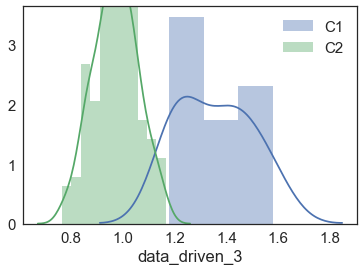

In [677]:
plt.close()
sns.distplot(jdf.loc[np.array(jdf.index)[labs==0],col],label='C1')
sns.distplot(jdf.loc[np.array(jdf.index)[labs==1],col],label='C2')
plt.legend()
plt.show()

In [678]:
list(zip(m2.fit(jdf[col].values.reshape(-1,1)
                               ).predict_proba(jdf[col].values.reshape(-1,1))[:,0],
        jdf.loc[:,col]))

[(0.044517798260001552, 1.0368748806145236),
 (0.040152543485943784, 1.0288081223856371),
 (0.021700778046762185, 0.87897587455360693),
 (0.019973830106351564, 0.91760866000610442),
 (0.021918586656450349, 0.87673411023585501),
 (0.021639550841551006, 0.87963423644436878),
 (0.028858017902903217, 0.99803742031369636),
 (0.019991176756899307, 0.92118987836215438),
 (0.021001035017954355, 0.94702603133979124),
 (0.023395524088344673, 0.86437395894885638),
 (0.03041166987164395, 1.0036319082182923),
 (0.024139594102008933, 0.97515406932741477),
 (0.055732333630459582, 1.0529058730346559),
 (0.030044417489660719, 1.0023676657789444),
 (0.15303043108598227, 1.1115799545661844),
 (0.022249683006777553, 0.87358331611517037),
 (0.020472667711246523, 0.89638352400442634),
 (0.019993080242805536, 0.91312018738002076),
 (0.020194311471811711, 0.9311870117088078),
 (0.059819002864997507, 1.0576144055695931),
 (0.031623543373915423, 0.82693719498409235),
 (0.020022859184431595, 0.91067039600561439)

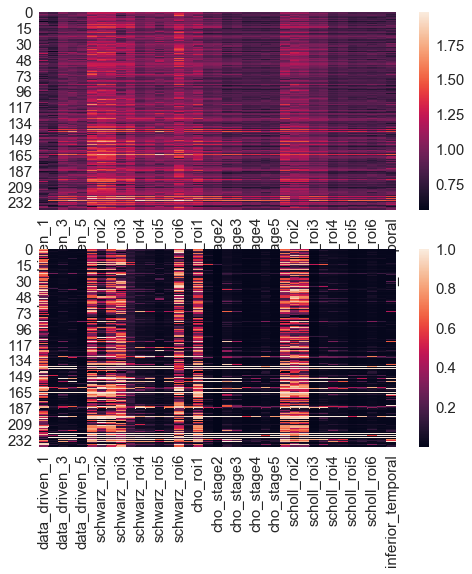

In [681]:
plt.close()
fig,(ax1,ax2) = plt.subplots(2,figsize=(8,8))
sns.heatmap(jdf[ncols],ax=ax1)
sns.heatmap(pdf,ax=ax2)
plt.show()

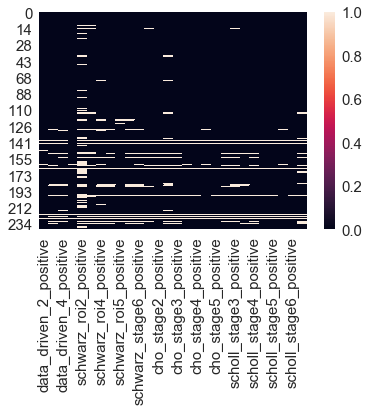

In [706]:
plt.close()
sns.heatmap(pdf[pcols].dropna(axis=1))
plt.show()

In [632]:
sortr1.sort_values('mean').columns

Index(['data_driven_1', 'data_driven_2', 'data_driven_3', 'data_driven_4',
       'data_driven_5', 'mean'],
      dtype='object')

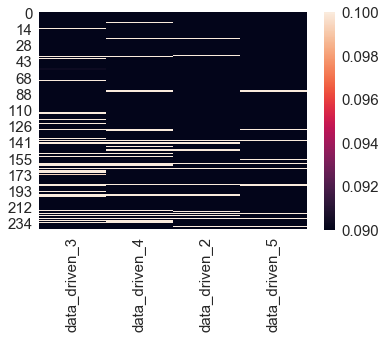

In [842]:
tdf = pandas.DataFrame(pdf[pdf.columns[1:5]])
sortr1 = pandas.DataFrame(tdf,copy=True)
sortr1.loc[:,'mean'] = sortr1.mean()
sortr2 = pandas.DataFrame(tdf,copy=True)
sortr2.loc['mean'] = sortr2.mean(axis=1)
plt.close()
sns.heatmap(tdf.loc[sortr2.sort_values('mean',axis=1).index
                   ][['data_driven_3','data_driven_4','data_driven_2','data_driven_5'
                     ]],vmin=0.09,vmax=0.1)
plt.show()

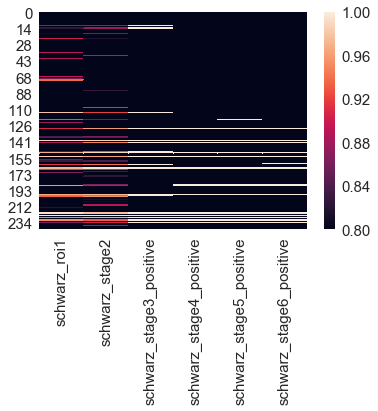

In [717]:
schwarzcols = ['schwarz_roi1','schwarz_stage2'] + [x for x in pcols if 'schwar' in x and 'tage' in x]
tdf = pandas.DataFrame(pdf[schwarzcols]).dropna(axis=1)
sortr1 = pandas.DataFrame(tdf,copy=True)
sortr1.loc[:,'mean'] = sortr1.mean()
sortr2 = pandas.DataFrame(tdf,copy=True)
sortr2.loc['mean'] = sortr2.mean(axis=1)
plt.close()
sns.heatmap(tdf.loc[sortr2.sort_values('mean',axis=1).index
                   ][sortr1.sort_values('mean').columns[:-1]], vmin=0.8)
plt.show()

In [843]:
from sklearn.cluster import KMeans
KMeans?

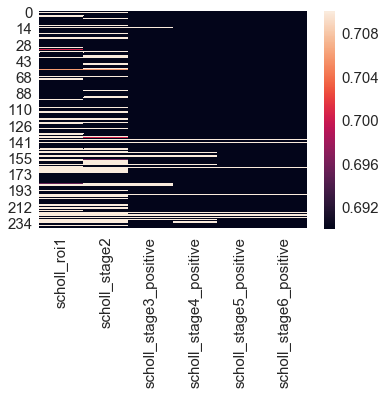

In [771]:
schollcols = ['scholl_roi1','scholl_stage2'] + [x for x in pcols if 'scholl' in x and 'tage' in x]
tdf = pandas.DataFrame(pdf[schollcols]).dropna(axis=1)
sortr1 = pandas.DataFrame(tdf,copy=True)
sortr1.loc[:,'mean'] = sortr1.mean()
sortr2 = pandas.DataFrame(tdf,copy=True)
sortr2.loc['mean'] = sortr2.mean(axis=1)
plt.close()
sns.heatmap(tdf.loc[sortr2.sort_values('mean',axis=1).index
                   ][sortr1.sort_values('mean').columns[:-1]], vmin=0.69,vmax=0.71)
plt.show()

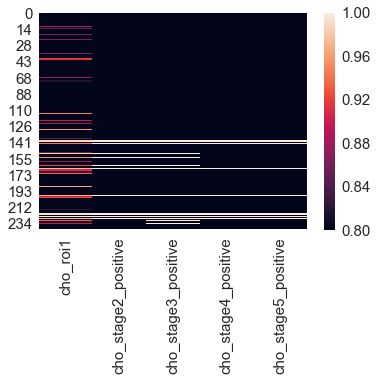

In [722]:
chocols = ['cho_roi1'] + [x for x in pcols if 'cho_' in x and 'tage' in x]
tdf = pandas.DataFrame(pdf[chocols]).dropna(axis=1)
sortr1 = pandas.DataFrame(tdf,copy=True)
sortr1.loc[:,'mean'] = sortr1.mean()
sortr2 = pandas.DataFrame(tdf,copy=True)
sortr2.loc['mean'] = sortr2.mean(axis=1)
plt.close()
sns.heatmap(tdf.loc[sortr2.sort_values('mean',axis=1).index
                   ][sortr1.sort_values('mean').columns[:-1]], vmin=0.8)
plt.show()

In [724]:
stagedf = pandas.DataFrame(index = jdf.index)

In [778]:
pdf.shape

(187, 74)

In [786]:
cols2

['scholl_roi1_positive',
 'scholl_stage2_positive',
 'scholl_stage3_positive',
 'scholl_stage4_positive',
 'scholl_stage5_positive',
 'scholl_stage6_positive']

In [825]:
stagedf = pandas.DataFrame(index = jdf.index)
author='scholl'
cols1 = ['%s_roi1'%author] + [x for x in ncols if '%s_stage'%author in x]
for i in range(len(cols1)):
    stagedf['%s_stage%d_p'%(author,(i+1))] = pdf[cols1[:i+1]].mean(axis=1)
cols2 = ['%s_roi1'%author,'%s_roi2'%author] + [x for x in pcols if '%s_stage'%author in x and 'pos' in x]
cols2.remove('%s_stage2_positive'%author)
for i,row in pdf.iterrows():
    scol = '%s_stage_bin'%author
    if row[cols2[-1]] == 1:
        stagedf.loc[i,scol] = 6
    elif row[cols2[-2]] == 1:
        stagedf.loc[i,scol] = 5
    elif row[cols2[-3]] == 1:
        stagedf.loc[i,scol] = 4
    elif row[cols2[-4]] == 1:
        stagedf.loc[i,scol] = 3
    elif row[cols2[-5]] > 0.8:
        stagedf.loc[i,scol] = 2
    elif row[cols2[-6]] > 0.5:
        stagedf.loc[i,scol] = 1
    else:
        stagedf.loc[i,scol] = 0


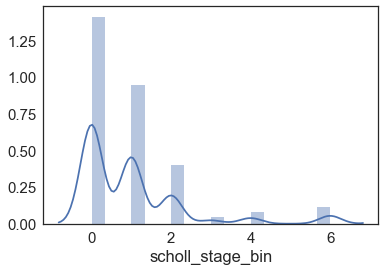

In [812]:
plt.close()
sns.distplot(stagedf['scholl_stage_bin'])
plt.show()

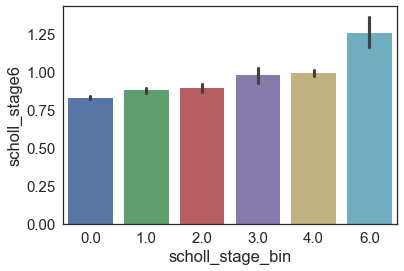

In [826]:
plt.close()
sns.barplot(x = stagedf['scholl_stage_bin'], y = jdf['scholl_stage6'])
plt.show()

In [817]:
stagedf = pandas.DataFrame(index = jdf.index)
author='schwarz'
cols1 = ['%s_roi1'%author] + [x for x in ncols if '%s_stage'%author in x]
for i in range(len(cols1)):
    stagedf['%s_stage%d_p'%(author,(i+1))] = pdf[cols1[:i+1]].mean(axis=1)
cols2 = ['%s_roi1'%author,'%s_roi2'%author] + [x for x in pcols if '%s_stage'%author in x and 'pos' in x]
cols2.remove('%s_stage2_positive'%author)
for i,row in pdf.iterrows():
    scol = '%s_stage_bin'%author
    if row[cols2[-1]] == 1:
        stagedf.loc[i,scol] = 6
    elif row[cols2[-2]] == 1:
        stagedf.loc[i,scol] = 5
    elif row[cols2[-3]] == 1:
        stagedf.loc[i,scol] = 4
    elif row[cols2[-4]] == 1:
        stagedf.loc[i,scol] = 3
    elif row[cols2[-5]] > 0.8:
        stagedf.loc[i,scol] = 2
    elif row[cols2[-6]] > 0.5:
        stagedf.loc[i,scol] = 1
    else:
        stagedf.loc[i,scol] = 0



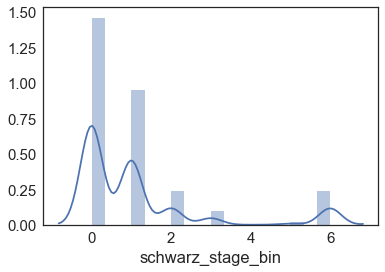

In [818]:
plt.close()
sns.distplot(stagedf['schwarz_stage_bin'])
plt.show()

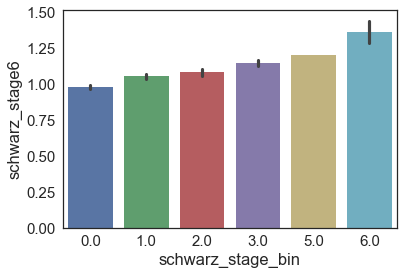

In [823]:
plt.close()
sns.barplot(x = stagedf['schwarz_stage_bin'], y = jdf['schwarz_stage6'])
plt.show()

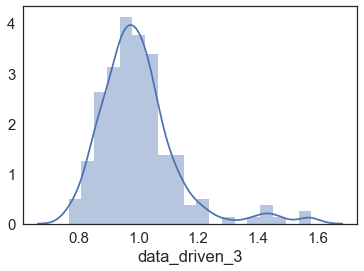

In [634]:
plt.close()
sns.distplot(jdf['data_driven_3'])
plt.show()

In [640]:
jnk = m2.fit(jdf['data_driven_3'].values.reshape(-1,1)
                               ).predict_proba(jdf['data_driven_3'].values.reshape(-1,1))

In [645]:
list(zip(m2.fit(jdf['data_driven_3'].values.reshape(-1,1)
               ).predict(jdf['data_driven_3'].values.reshape(-1,1)),
         jdf['data_driven_3']))
         
         

[(0, 1.0368748806145236),
 (0, 1.0288081223856371),
 (0, 0.87897587455360693),
 (0, 0.91760866000610442),
 (0, 0.87673411023585501),
 (0, 0.87963423644436878),
 (0, 0.99803742031369636),
 (0, 0.92118987836215438),
 (0, 0.94702603133979124),
 (0, 0.86437395894885638),
 (0, 1.0036319082182923),
 (0, 0.97515406932741477),
 (0, 1.0529058730346559),
 (0, 1.0023676657789444),
 (0, 1.1115799545661844),
 (0, 0.87358331611517037),
 (0, 0.89638352400442634),
 (0, 0.91312018738002076),
 (0, 0.9311870117088078),
 (0, 1.0576144055695931),
 (0, 0.82693719498409235),
 (0, 0.91067039600561439),
 (0, 1.0184145494452623),
 (0, 1.0769931100169308),
 (0, 1.0163318510885877),
 (0, 0.98803296578136524),
 (0, 0.93173428774365519),
 (0, 0.89208641924359855),
 (0, 1.0218225822860121),
 (0, 0.85809952756464991),
 (0, 0.99721353606477958),
 (0, 0.99682803610480519),
 (0, 1.0120018268878486),
 (0, 0.94640637942569494),
 (0, 0.96480277605696663),
 (0, 0.97103990042724264),
 (0, 0.98052298300341156),
 (0, 0.8685351

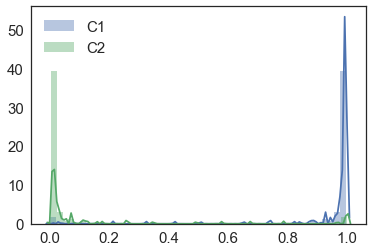

In [641]:
plt.close()
sns.distplot(jnk[:,0],label='C1')
sns.distplot(jnk[:,1],label='C2')
plt.legend()
plt.show()

In [70]:
from importlib import reload
reload(vb)

<module 'vogel_basc' from '/Users/jakevogel/git/data_driven_pathology/vogel_basc.py'>

In [147]:
sys.path.insert(0,'/Users/jakevogel/git/data_driven_pathology/')
import vogel_basc as vb

In [150]:
vcols = [x for x in n_indata.columns if 'data_' in x]

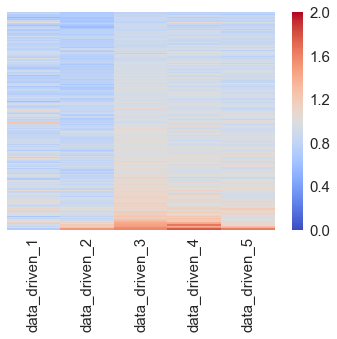

In [151]:
plt.close()
sns.heatmap(n_indata.loc[jnk.sort_values('sumx').index][vcols],
            yticklabels=False,cmap="coolwarm",vmin=0,vmax=2)
plt.show()

running cluster analyses
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
working on iteration 500
working on iteration 600
working on iteration 700
working on iteration 800
working on iteration 900
creating stability matrix
working on iteration 0
working on iteration 100
working on iteration 200
working on iteration 300
working on iteration 400
working on iteration 500
working on iteration 600
working on iteration 700
working on iteration 800
working on iteration 900


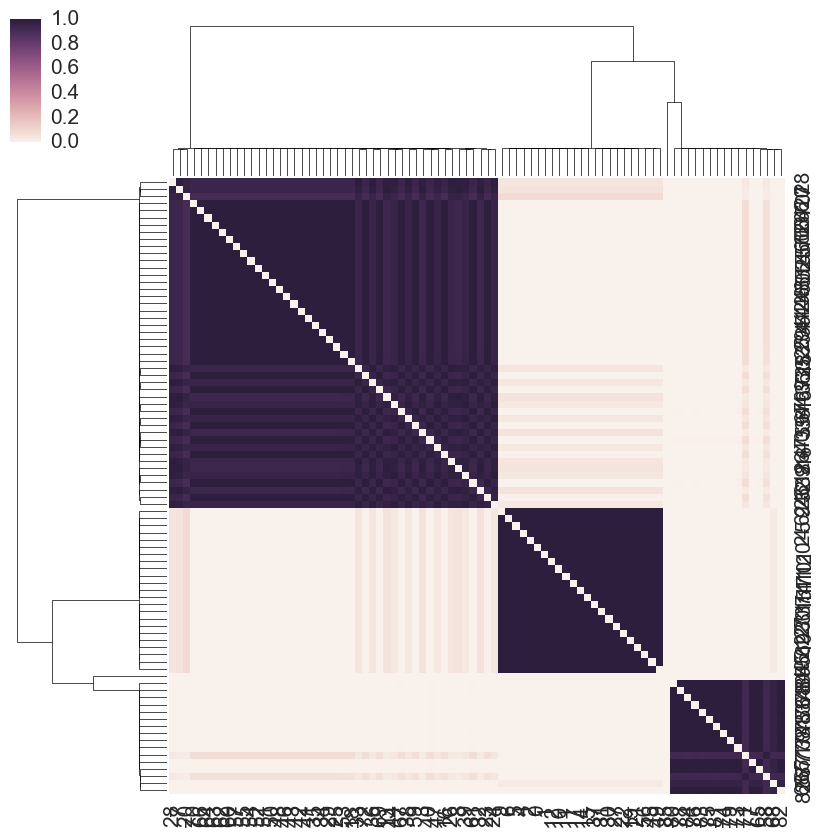

In [88]:
output = vb.poormans_basc(n_indata.loc[jnk.sort_values('sumx').index][vcols], 4, 1000, 100, True)

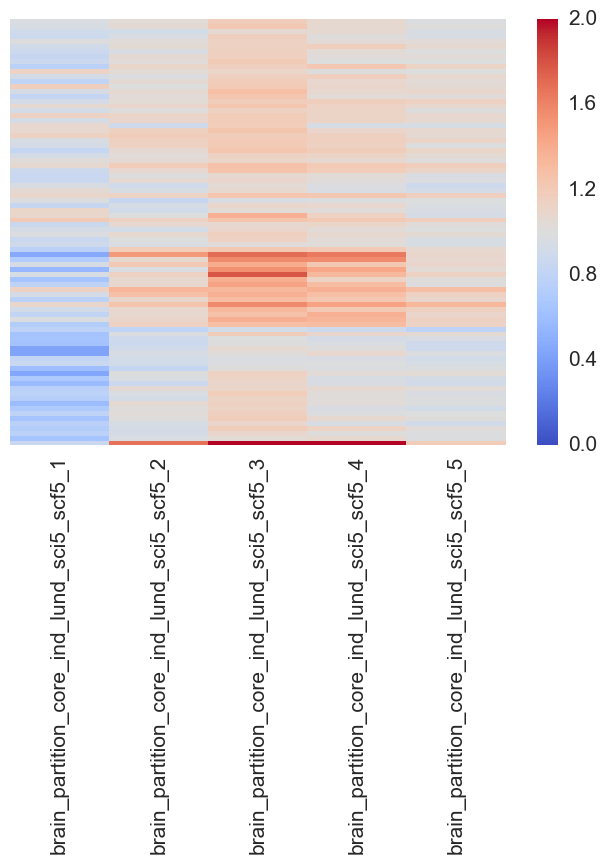

In [85]:
plt.close()
sns.heatmap(output[1].loc[output[1].sort_values('order').index][output[1].columns[:-1]],
            yticklabels=False,cmap="coolwarm",vmin=0,vmax=2)
plt.show()

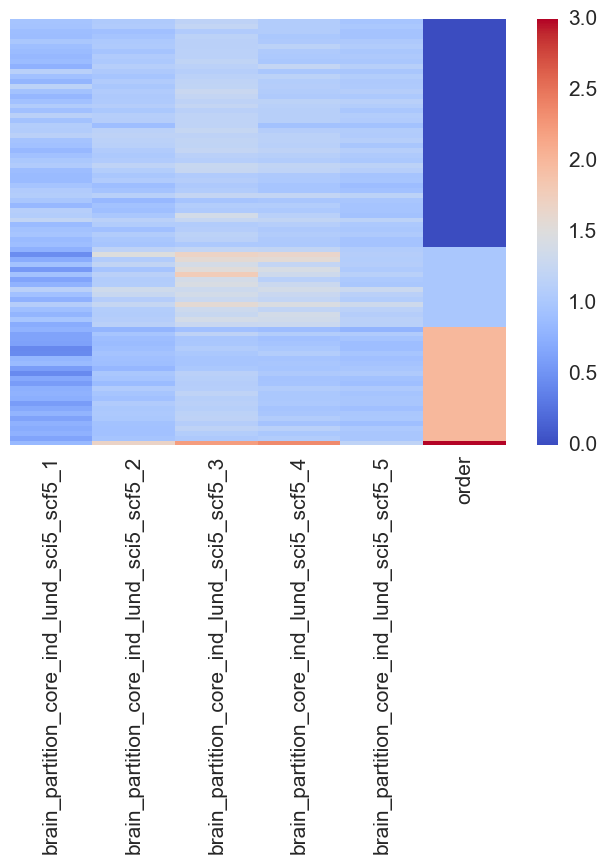

In [86]:
plt.close()
sns.heatmap(output[1].loc[output[1].sort_values('order').index],
            yticklabels=False,cmap="coolwarm",vmin=0)
plt.show()

In [74]:
clus_data = n_indata.loc[jnk.sort_values('sumx').index]

In [75]:
clus_data['cluster'] = output[1]['order']

In [78]:
clus_data.columns[-9:]

Index(['AGE', 'PTGENDER', 'PTEDUCAT', 'MMSE', 'ADNI_MEM', 'ADNI_EF',
       'DX_final', 'av45_status_wcb', 'cluster'],
      dtype='object')

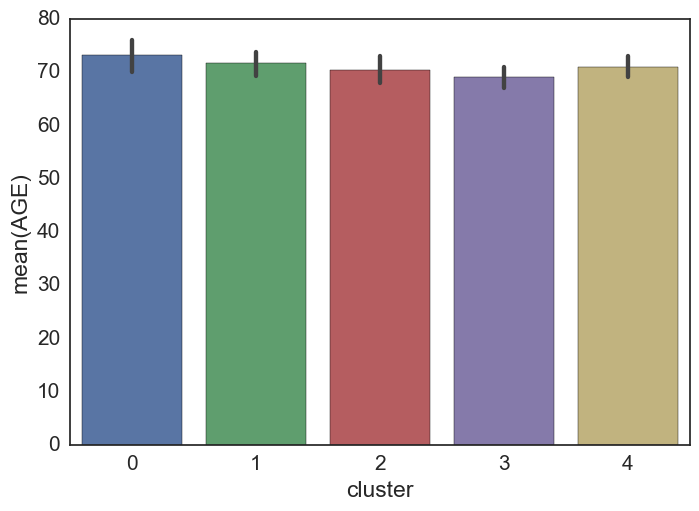

In [83]:
plt.close()
sns.barplot('cluster','AGE',data=clus_data)
plt.show()

It's got promise but probably not for the paper. Let's move on to...
## Hippocampus analysis

In [45]:
from glob import glob
import nibabel as ni

In [46]:
scans = sorted(glob('/Users/jakevogel/Science/tau/nan_sn*'))
dkt = ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').get_data().astype(int)
basc = ni.load('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_core_ind_lund_sci5_scf5.nii.gz'
              ).get_data().astype(int)
basc2 = ni.load('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/brain_partition_consensus_ind_lund_sci5_scf5.nii.gz'
              ).get_data().astype(int)


In [47]:
len(hipp[nhipp==1])/len(hipp[hipp==1])

NameError: name 'hipp' is not defined

In [196]:
len(hipp[bhipp==1])/len(hipp[hipp==1])

0.0005299768135144088

In [49]:
nhipp_cons = np.zeros_like(hipp)
nhipp_cons[hipp==1] = 1
nhipp_cons[basc2!=3] = 0

bhipp_cons = np.zeros_like(hipp)
bhipp_cons[hipp==1] = 1
bhipp_cons[basc2!=1] = 0

In [198]:
len(hipp[nhipp_cons==1])/len(hipp[hipp==1])

0.23424975157336866

In [199]:
len(hipp[bhipp_cons==1])/len(hipp[hipp==1])

0.3468035773434912

In [50]:
# VOXEL PERCENTAGES
print('% hipp voxels in Cluster 1 (core)', len(hipp[nhipp==1])/len(hipp[hipp==1]))
print('% hipp voxels in Cluster 3 (core)',len(hipp[bhipp==1])/len(hipp[hipp==1]))
print('% hipp voxels in Cluster 1 (total)',len(hipp[nhipp_cons==1])/len(hipp[hipp==1]))
print('% hipp voxels in Cluster 3 (total)',len(hipp[bhipp_cons==1])/len(hipp[hipp==1]))

% hipp voxels in Cluster 1 (core) 0.10142431268631998
% hipp voxels in Cluster 3 (core) 0.0005299768135144088
% hipp voxels in Cluster 1 (total) 0.23424975157336866
% hipp voxels in Cluster 3 (total) 0.3468035773434912


In [51]:
# Now using only voxels that are available (i.e. not masked)
# VOXEL PERCENTAGES
print('% hipp voxels in Cluster 1 (core)', len(hipp[nhipp==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))
print('% hipp voxels in Cluster 3 (core)',len(hipp[bhipp==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))
print('% hipp voxels in Cluster 1 (total)',len(hipp[nhipp_cons==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))
print('% hipp voxels in Cluster 3 (total)',len(hipp[bhipp_cons==1])/len(hipp[(nhipp_cons==1) | (bhipp_cons==1)]))

% hipp voxels in Cluster 1 (core) 0.1745525025652719
% hipp voxels in Cluster 3 (core) 0.0009120966822483183
% hipp voxels in Cluster 1 (total) 0.4031467335537567
% hipp voxels in Cluster 3 (total) 0.5968532664462433


In [48]:
# Make hipp mask
hipp = np.zeros_like(dkt)
hipp[dkt==36] = 1
hipp[dkt==75] = 1

#save
nimg = ni.Nifti1Image(hipp,ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').affine)
nimg.to_filename('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/hippocampus')

# mask further with basc
nhipp = np.zeros_like(hipp)
nhipp[hipp==1] = 1
nhipp[basc!=3] = 0

# save mask
nimg = ni.Nifti1Image(nhipp,ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').affine)
nimg.to_filename('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/maskd_hippocampus')

# get the other side
bhipp = np.zeros_like(hipp)
bhipp[hipp==1] = 1
bhipp[basc!=1] = 0
nimg = ni.Nifti1Image(bhipp,ni.load('/Users/jakevogel/Science/tau/dkt_atlas_1mm.nii.gz').affine)
nimg.to_filename('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/bad_hippocampus')

In [52]:
for scan in scans:
    sid = scan.split('/')[5].split('_')[2]
    dat = ni.load(scan).get_data()
    hippdf.ix[sid, 'new_hipp_tau_cons'] = np.nanmean(dat[nhipp_cons==1])
    hippdf.ix[sid, 'bad_hipp_tau_cons'] = np.nanmean(dat[bhipp_cons==1])

NameError: name 'hippdf' is not defined

In [53]:
# extract values
hippdf = pandas.DataFrame(index = [x.split('/')[5].split('_')[2] for x in scans], 
                          columns = ['hipp_tau','new_hipp_tau'])
for scan in scans:
    sid = scan.split('/')[5].split('_')[2]
    dat = ni.load(scan).get_data()
    hippdf.ix[sid, 'hipp_tau'] = np.nanmean(dat[hipp==1])
    hippdf.ix[sid, 'new_hipp_tau'] = np.nanmean(dat[nhipp==1])
    hippdf.ix[sid, 'bad_hipp_tau'] = np.nanmean(dat[bhipp==1])
    hippdf.ix[sid, 'new_hipp_tau_cons'] = np.nanmean(dat[nhipp_cons==1])
    hippdf.ix[sid, 'bad_hipp_tau_cons'] = np.nanmean(dat[bhipp_cons==1])
    print('finished subject',sid)
#scans[0]

finished subject 002-S-4229
finished subject 002-S-4262
finished subject 002-S-4521
finished subject 002-S-4654
finished subject 002-S-4799
finished subject 007-S-2394
finished subject 007-S-4620
finished subject 007-S-4637
finished subject 012-S-4643
finished subject 018-S-0142
finished subject 018-S-2180
finished subject 018-S-4313
finished subject 018-S-4399
finished subject 019-S-4367
finished subject 019-S-4835
finished subject 019-S-5242
finished subject 022-S-2263
finished subject 023-S-1190
finished subject 023-S-4448
finished subject 027-S-2183
finished subject 027-S-2245
finished subject 027-S-2336
finished subject 027-S-4869
finished subject 027-S-4919
finished subject 027-S-4926
finished subject 027-S-5083
finished subject 027-S-5127
finished subject 027-S-5277
finished subject 032-S-2247
finished subject 032-S-4429
finished subject 037-S-0303
finished subject 037-S-0377
finished subject 037-S-0467
finished subject 037-S-4028
finished subject 037-S-4071
finished subject 037

In [54]:
hippdf.to_excel('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/hipp_values.xls')

In [19]:
hippdf = pandas.ExcelFile('/Users/jakevogel/Science/tau/tau_masks/1mm_lund/hipp_values.xls'
                         ).parse('Sheet1')

In [20]:
smf.ols('hipp_tau ~ new_hipp_tau',data=hippdf.astype(float)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hipp_tau   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     187.7
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           1.53e-23
Time:                        00:57:09   Log-Likelihood:                 92.177
No. Observations:                  90   AIC:                            -180.4
Df Residuals:                      88   BIC:                            -175.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3997      0.063      6.339      0.000       0.274       0.525
new_hipp_tau     0.7094      0.052     13.702      0.000       0.606       0.812
==============================================================================
Omnibus:                        0.346   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.841   Jarque-Bera (JB):                0.318
Skew:                          -0.138   Prob(JB):                        0.853
Kurtosis:                       2.910   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

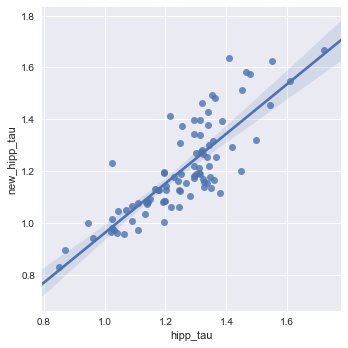

In [21]:
plt.close()
sns.lmplot('hipp_tau','new_hipp_tau',data=hippdf.astype(float))
plt.show()

In [22]:
ncols = cs.columns
ncols = ['idx','subids'] + ncols[2:].tolist()
cs.columns = ncols

In [23]:
cs['old_hipp_tau'] = hippdf['hipp_tau'].astype(float).values
cs['new_hipp_tau'] = hippdf['new_hipp_tau'].astype(float).values

In [57]:
jdf.columns[:14]

Index(['CDRSB', 'ADAS11', 'ADAS13', 'FAQ', 'MOCA', 'EcogPtTotal',
       'EcogSPTotal', 'MMSE', 'ADNI_MEM', 'ADNI_EF', 'DX_final', 'AGE',
       'PTGENDER', 'PTEDUCAT'],
      dtype='object')

In [73]:
jdf['AV1451_Whole_Hippocampus'] = hippdf['hipp_tau'].astype(float).values
jdf['new_hipp_tau'] = hippdf['new_hipp_tau'].astype(float).values
jdf['bad_hipp_tau'] = hippdf['bad_hipp_tau'].astype(float).values
jdf['AV1451_Early_Tau_Cluster'] = hippdf['new_hipp_tau_cons'].astype(float).values
jdf['AV1451_OffTarget_Cluster'] = hippdf['bad_hipp_tau_cons'].astype(float).values

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

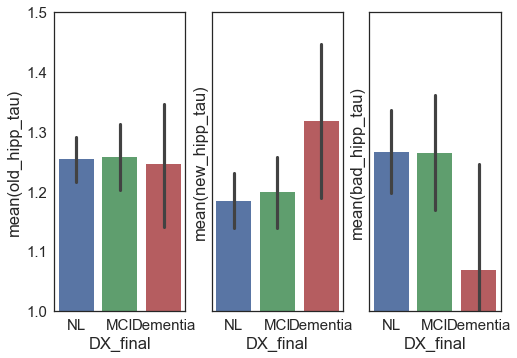

In [59]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_final','old_hipp_tau',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax1)
sns.barplot('DX_final','new_hipp_tau',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax2)
sns.barplot('DX_final','bad_hipp_tau',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

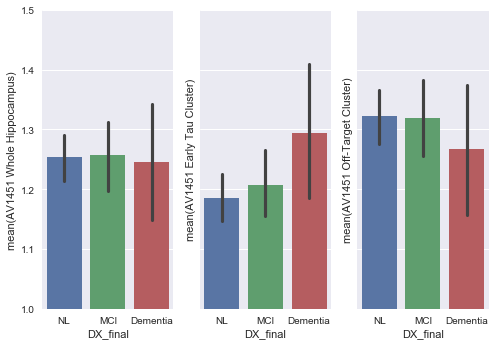

In [26]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_final','AV1451 Whole Hippocampus',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax1)
sns.barplot('DX_final','AV1451 Early Tau Cluster',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax2)
sns.barplot('DX_final','AV1451 Off-Target Cluster',data=jdf, order = ['NL', 'MCI', 'Dementia'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

In [28]:
stats.f_oneway(jdf[jdf.DX_final=='NL']['AV1451 Early Tau Cluster'],
              jdf[jdf.DX_final=='MCI']['AV1451 Early Tau Cluster'],
              jdf[jdf.DX_final=='Dementia']['AV1451 Early Tau Cluster'])

F_onewayResult(statistic=1.8465442694850451, pvalue=0.16391176914509267)

In [43]:
mod = smf.mnlogit('DX_final ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster',
                 data=jdf).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.884668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:                        MNLogit   Df Residuals:                       80
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                 0.08083
Time:                        01:11:57   Log-Likelihood:                -79.620
converged:                       True   LL-Null:                       -86.621
                                        LLR p-value:                   0.08169
============================================================================================
         y=DX_final[MCI]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    4.0547      6.167      0.658      0.511      -8.032      16.141
PTGENDER[T.Male]            -0.1923      0.812     -0.237      0.813      -1.783       1.399
AGE                         -0.0434      0.066     -0.657      0.511      -0.173       0.086
PTEDUCAT                     0.2722      0.147      1.855      0.064      -0.015       0.560
AV1451_Early_Tau_Cluster    -3.0635      2.237     -1.369      0.171      -7.448       1.321
--------------------------------------------------------------------------------------------
          y=DX_final[NL]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.6895      6.222      1.718      0.086      -1.506      22.885
PTGENDER[T.Male]            -1.0468      0.806     -1.299      0.194      -2.626       0.532
AGE                         -0.0852      0.067     -1.279      0.201      -0.216       0.045
PTEDUCAT                     0.1882      0.146      1.292      0.197      -0.097       0.474
AV1451_Early_Tau_Cluster    -4.4291      2.279     -1.944      0.052      -8.896       0.037
============================================================================================
"""

In [45]:
mod = smf.ols('AV1451_Early_Tau_Cluster ~ AGE + PTGENDER + PTEDUCAT + DX_final',
                 data=jdf).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     AV1451_Early_Tau_Cluster   R-squared:                       0.083
Model:                                  OLS   Adj. R-squared:                  0.028
Method:                       Least Squares   F-statistic:                     1.521
Date:                      Thu, 14 Dec 2017   Prob (F-statistic):              0.192
Time:                              01:12:47   Log-Likelihood:                 40.911
No. Observations:                        90   AIC:                            -69.82
Df Residuals:                            84   BIC:                            -54.82
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1939      0.236      5.051      0.000       0.724       1.664
PTGENDER[T.Male]    -0.0682      0.035     -1.936      0.056      -0.138       0.002
DX_final[T.MCI]     -0.0858      0.058     -1.479      0.143      -0.201       0.030
DX_final[T.NL]      -0.1174      0.057     -2.054      0.043      -0.231      -0.004
AGE                  0.0012      0.003      0.429      0.669      -0.004       0.007
PTEDUCAT             0.0035      0.007      0.528      0.599      -0.010       0.017
==============================================================================
Omnibus:                        4.165   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.743
Skew:                           0.497   Prob(JB):                        0.154
Kurtosis:                       3.093   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
mod = smf.ols('AV1451_Early_Tau_Cluster ~ AGE + PTGENDER + PTEDUCAT',data=jdf).fit()
jdf['AV1451 Early NFT'] = mod.resid
mod = smf.ols('AV1451_OffTarget_Cluster ~ AGE + PTGENDER + PTEDUCAT',data=jdf).fit()
jdf['AV1451 Off-Target'] = mod.resid
mod = smf.ols('AV1451_Whole_Hippocampus ~ AGE + PTGENDER + PTEDUCAT',data=jdf).fit()
jdf['AV1451 Whole Hippocampus'] = mod.resid

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [222]:
jdf.loc[:,'DX_final'] = ['AD' if x=='Dementia' else x for x in jdf.DX_final]

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


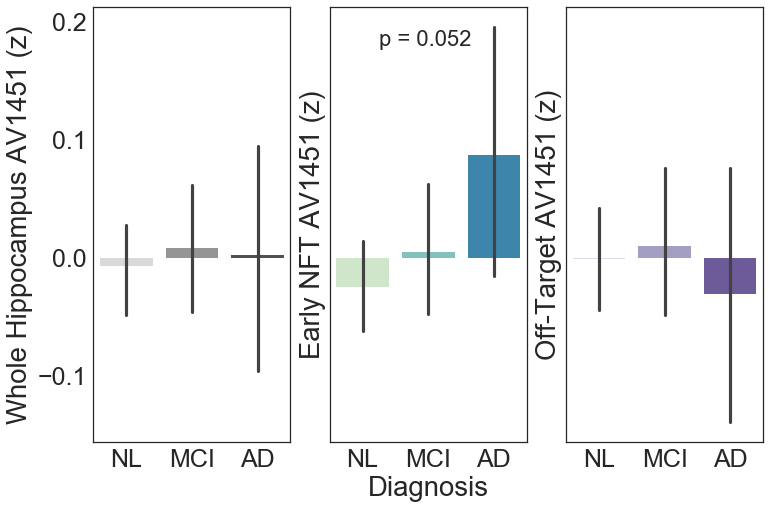

In [247]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('DX_final','AV1451 Whole Hippocampus',data=jdf, 
            order = ['NL', 'MCI', 'AD'], ax=ax1, palette='Greys')
sns.barplot('DX_final','AV1451 Early NFT',data=jdf, 
            order = ['NL', 'MCI', 'AD'], ax=ax2, palette='GnBu')
sns.barplot('DX_final','AV1451 Off-Target',data=jdf, 
            order = ['NL', 'MCI', 'AD'], ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451 (z)')
ax2.set_ylabel('Early NFT AV1451 (z)')
ax3.set_ylabel('Off-Target AV1451 (z)')
ax1.set_xlabel('')
ax2.set_xlabel('Diagnosis')
ax3.set_xlabel('')
plt.yticks([-0.1, 0, 0.1, 0.2])
ax2.text(0.25, 0.18,'p = 0.052', fontsize=22)
#plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/DX.eps')
plt.show()

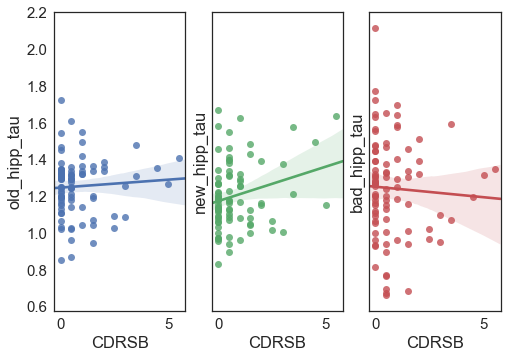

In [61]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('CDRSB','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('CDRSB','new_hipp_tau',data=jdf, ax=ax2)
sns.regplot('CDRSB','bad_hipp_tau',data=jdf, ax=ax3)
plt.show()

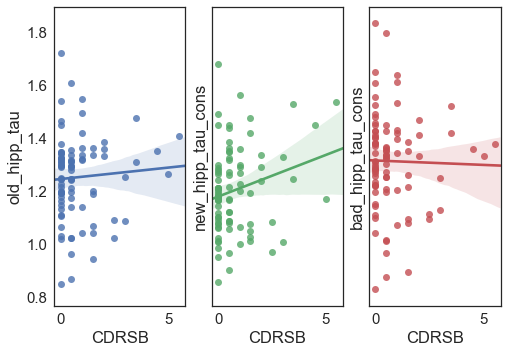

In [62]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('CDRSB','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('CDRSB','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.regplot('CDRSB','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.show()

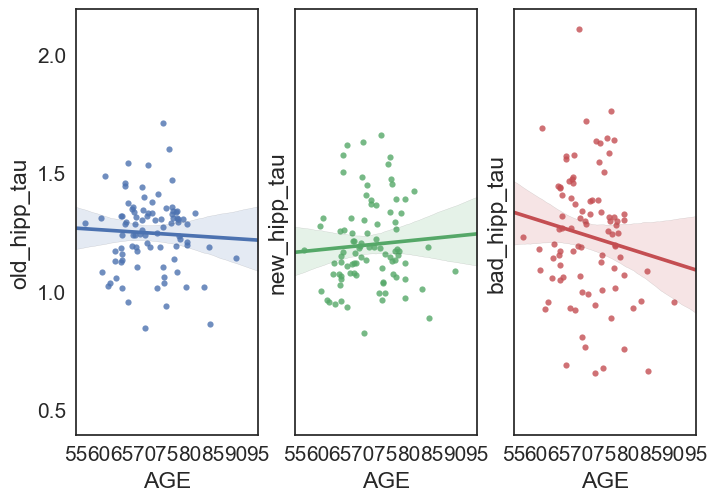

In [223]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('AGE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('AGE','new_hipp_tau',data=jdf, ax=ax2)
sns.regplot('AGE','bad_hipp_tau',data=jdf, ax=ax3)
plt.show()

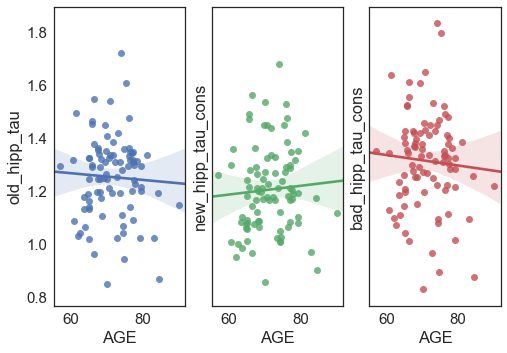

In [63]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('AGE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('AGE','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.regplot('AGE','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.show()

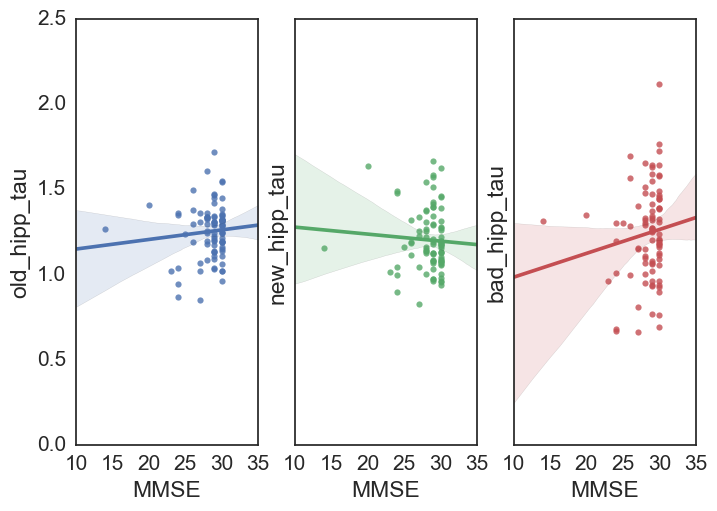

In [225]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('MMSE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('MMSE','new_hipp_tau',data=jdf, ax=ax2)
sns.regplot('MMSE','bad_hipp_tau',data=jdf, ax=ax3)
plt.show()

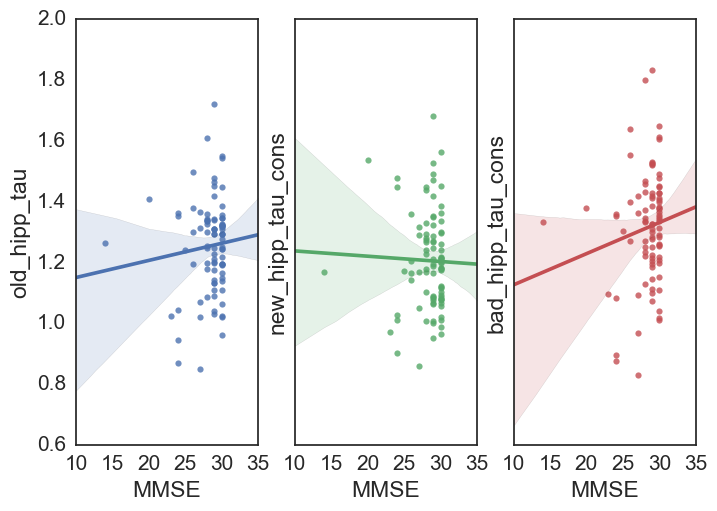

In [226]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.regplot('MMSE','old_hipp_tau',data=jdf, ax=ax1)
sns.regplot('MMSE','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.regplot('MMSE','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.show()

In [52]:
for i, row in jdf.iterrows():
    av45 = cs.ix[i,'av45_status_wcb']
    if pandas.notnull(av45):
        if av45 == 0:
            jdf.ix[i,'DX_amyloid'] = '%s-'%row['DX_final']
        else:
            jdf.ix[i,'DX_amyloid'] = '%s+'%row['DX_final']
    else:
        jdf.ix[i,'DX_amyloid'] = np.nan
        

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [190]:
jdf['av45'] = cs.av45_status_wcb
jdf['av45'] = ['Aβ+' if x == 1 else 'Aβ-' for x in jdf['av45']]

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


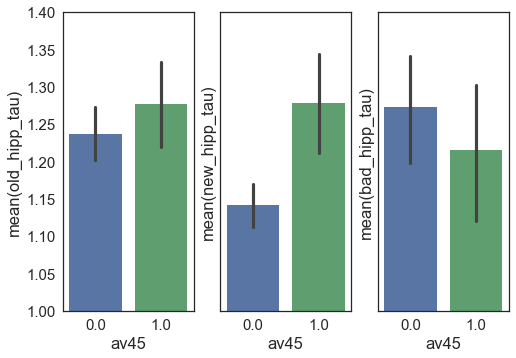

In [66]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('av45','old_hipp_tau',data=jdf, ax=ax1)
sns.barplot('av45','new_hipp_tau',data=jdf, ax=ax2)
sns.barplot('av45','bad_hipp_tau',data=jdf, ax=ax3)
plt.ylim(1.0, 1.4)
plt.show()

In [240]:
12/90

0.13333333333333333

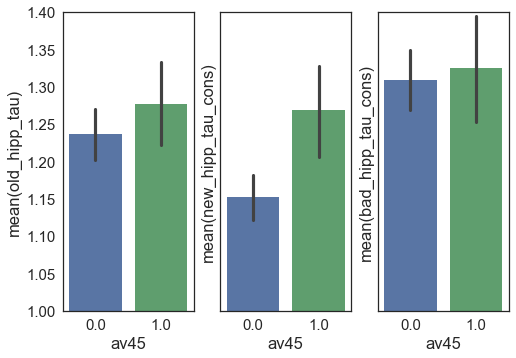

In [67]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('av45','old_hipp_tau',data=jdf, ax=ax1)
sns.barplot('av45','new_hipp_tau_cons',data=jdf, ax=ax2)
sns.barplot('av45','bad_hipp_tau_cons',data=jdf, ax=ax3)
plt.ylim(1.0, 1.4)
plt.show()

In [55]:
stats.ttest_ind(jdf[jdf['av45'] == 0]['AV1451 Early Tau Cluster'],
               jdf[jdf['av45'] == 1]['AV1451 Early Tau Cluster'])

Ttest_indResult(statistic=-3.5404349043851462, pvalue=0.00065087459260356937)

In [56]:
mod = smf.mnlogit('av45 ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster',
                 data=jdf).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 0.512176
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                   av45   No. Observations:                   87
Model:                        MNLogit   Df Residuals:                       82
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                  0.2553
Time:                        01:17:04   Log-Likelihood:                -44.559
converged:                       True   LL-Null:                       -59.837
                                        LLR p-value:                 3.770e-06
============================================================================================
                  av45=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -19.3256      5.092     -3.796      0.000     -29.305      -9.346
PTGENDER[T.Male]             1.0715      0.588      1.823      0.068      -0.080       2.223
AGE                          0.1738      0.051      3.387      0.001       0.073       0.274
PTEDUCAT                    -0.1346      0.103     -1.304      0.192      -0.337       0.068
AV1451_Early_Tau_Cluster     6.8474      2.019      3.391      0.001       2.890      10.805
============================================================================================
"""

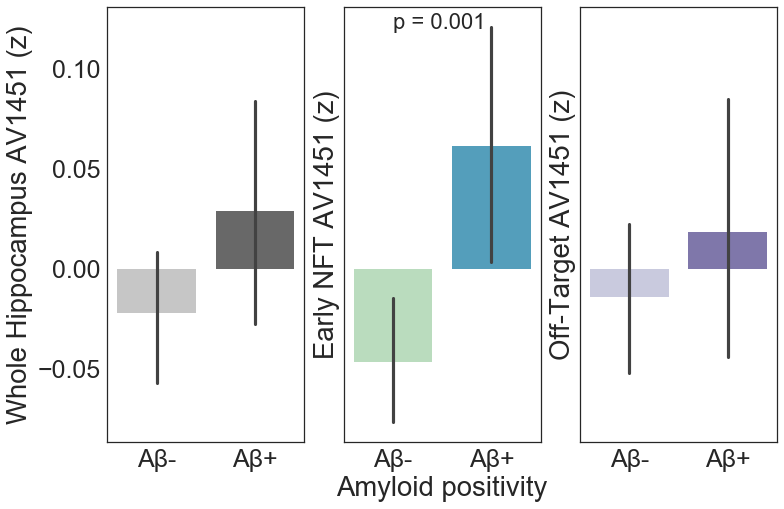

In [246]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('av45','AV1451 Whole Hippocampus',data=jdf, ax=ax1, palette='Greys')
sns.barplot('av45','AV1451 Early NFT',data=jdf, ax=ax2, palette='GnBu')
sns.barplot('av45','AV1451 Off-Target',data=jdf, ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451 (z)')
ax2.set_ylabel('Early NFT AV1451 (z)')
ax3.set_ylabel('Off-Target AV1451 (z)')
ax1.set_xlabel('')
ax2.set_xlabel('Amyloid positivity')
ax3.set_xlabel('')
ax2.text(0.0, 0.12,'p = 0.001', fontsize=22)
#plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/amyloid.eps')
plt.show()

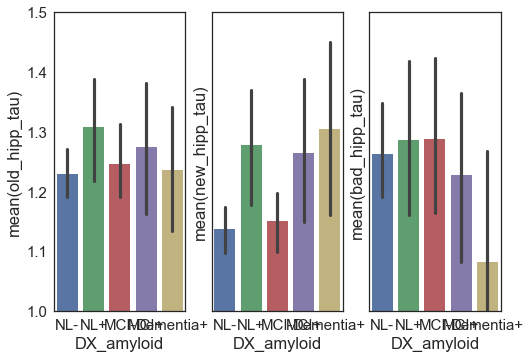

In [68]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_amyloid','old_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax1)
sns.barplot('DX_amyloid','new_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax2)
sns.barplot('DX_amyloid','bad_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

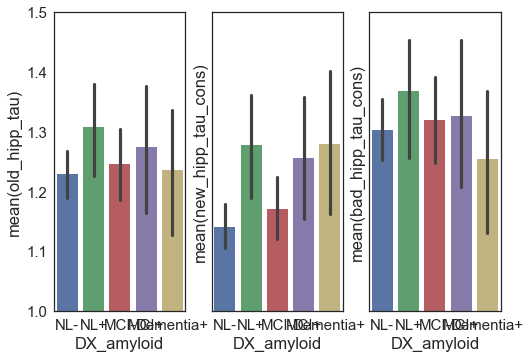

In [69]:
plt.close()
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.barplot('DX_amyloid','old_hipp_tau',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax1)
sns.barplot('DX_amyloid','new_hipp_tau_cons',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax2)
sns.barplot('DX_amyloid','bad_hipp_tau_cons',data=jdf, order = ['NL-', 'NL+', 'MCI-', 'MCI+', 'Dementia+'], ax=ax3)
plt.ylim(1.0, 1.5)
plt.show()

In [61]:
stats.f_oneway(jdf[jdf.DX_amyloid == 'NL-']['AV1451 Early Tau Cluster'],
               jdf[jdf.DX_amyloid == 'NL+']['AV1451 Early Tau Cluster'],
                jdf[jdf.DX_amyloid == 'MCI-']['AV1451 Early Tau Cluster'],
                jdf[jdf.DX_amyloid == 'MCI+']['AV1451 Early Tau Cluster'],
                jdf[jdf.DX_amyloid == 'Dementia+']['AV1451 Early Tau Cluster']
               )

F_onewayResult(statistic=3.2128914829913717, pvalue=0.016754271116635355)

In [62]:
mod = smf.mnlogit('DX_amyloid ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster',
                 data=jdf).fit()
mod.summary()

Optimization terminated successfully.
         Current function value: 1.302814
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                   87
Model:                        MNLogit   Df Residuals:                       67
Method:                           MLE   Df Model:                           16
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                  0.1556
Time:                        01:22:25   Log-Likelihood:                -113.34
converged:                       True   LL-Null:                       -134.23
                                        LLR p-value:                 0.0004257
============================================================================================
      y=DX_amyloid[MCI+]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.0456      7.932     -0.888      0.374     -22.592       8.500
PTGENDER[T.Male]             0.1915      0.963      0.199      0.842      -1.696       2.079
AGE                          0.0793      0.086      0.921      0.357      -0.089       0.248
PTEDUCAT                     0.1082      0.161      0.672      0.501      -0.207       0.423
AV1451_Early_Tau_Cluster    -0.0502      2.533     -0.020      0.984      -5.015       4.914
--------------------------------------------------------------------------------------------
      y=DX_amyloid[MCI-]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   12.9581      8.049      1.610      0.107      -2.818      28.735
PTGENDER[T.Male]            -1.3082      0.976     -1.340      0.180      -3.221       0.605
AGE                         -0.1342      0.085     -1.574      0.115      -0.301       0.033
PTEDUCAT                     0.3717      0.175      2.126      0.033       0.029       0.714
AV1451_Early_Tau_Cluster    -6.4369      3.015     -2.135      0.033     -12.346      -0.528
--------------------------------------------------------------------------------------------
       y=DX_amyloid[NL+]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0908      8.270      0.011      0.991     -16.118      16.299
PTGENDER[T.Male]            -1.3589      0.971     -1.400      0.161      -3.261       0.543
AGE                         -0.0132      0.089     -0.149      0.882      -0.188       0.161
PTEDUCAT                     0.2124      0.173      1.228      0.219      -0.126       0.551
AV1451_Early_Tau_Cluster    -1.0291      2.856     -0.360      0.719      -6.626       4.568
--------------------------------------------------------------------------------------------
       y=DX_amyloid[NL-]       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   20.8038      8.070      2.578      0.010       4.986      36.621
PTGENDER[T.Male]            -1.8002      0.948     -1.900      0.057      -3.657       0.057
AGE                         -0.1621      0.085     -1.911      0.056      -0.328       0.004
PTEDUCAT                     0.1745      0.164      1.063      0.288      -0.147       0.496
AV1451_Early_Tau_Cluster    -8.2012      2.960     -2.771      0.006     -14.003      -2.399
============================================================================================
"""

In [63]:
mod = smf.ols('AV1451_Early_Tau_Cluster ~ AGE + PTGENDER + PTEDUCAT + DX_amyloid',
                 data=jdf).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     AV1451_Early_Tau_Cluster   R-squared:                       0.189
Model:                                  OLS   Adj. R-squared:                  0.117
Method:                       Least Squares   F-statistic:                     2.623
Date:                      Thu, 14 Dec 2017   Prob (F-statistic):             0.0173
Time:                              01:23:25   Log-Likelihood:                 44.281
No. Observations:                        87   AIC:                            -72.56
Df Residuals:                            79   BIC:                            -52.83
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.4626      0.246      5.936      0.000       0.972       1.953
PTGENDER[T.Male]      -0.0710      0.035     -2.047      0.044      -0.140      -0.002
DX_amyloid[T.MCI+]    -0.0162      0.064     -0.251      0.803      -0.144       0.112
DX_amyloid[T.MCI-]    -0.1326      0.063     -2.088      0.040      -0.259      -0.006
DX_amyloid[T.NL+]     -0.0229      0.066     -0.345      0.731      -0.155       0.109
DX_amyloid[T.NL-]     -0.1677      0.060     -2.784      0.007      -0.288      -0.048
AGE                   -0.0029      0.003     -0.944      0.348      -0.009       0.003
PTEDUCAT               0.0047      0.007      0.724      0.471      -0.008       0.018
==============================================================================
Omnibus:                        0.918   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.563
Skew:                           0.187   Prob(JB):                        0.755
Kurtosis:                       3.124   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

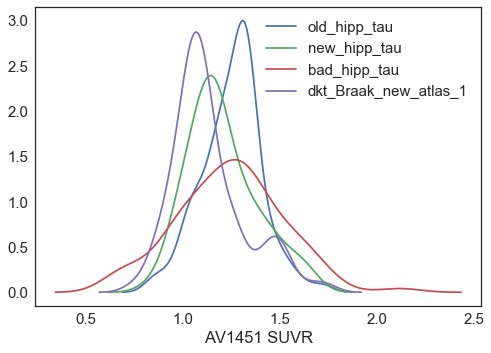

In [70]:
plt.close()
sns.kdeplot(jdf.old_hipp_tau)
sns.kdeplot(jdf.new_hipp_tau)
sns.kdeplot(jdf.bad_hipp_tau)
sns.kdeplot(jdf.dkt_Braak_new_atlas_1)
plt.xlabel('AV1451 SUVR')
plt.legend = True
plt.show()

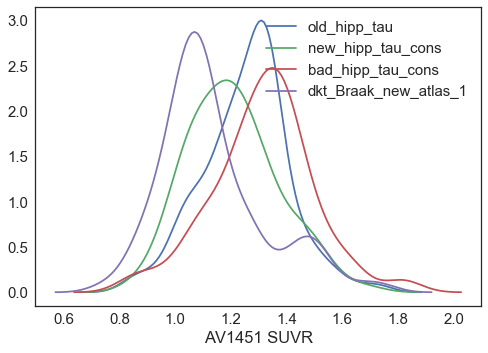

In [73]:
plt.close()
sns.kdeplot(jdf.old_hipp_tau)
sns.kdeplot(jdf.new_hipp_tau_cons)
sns.kdeplot(jdf.bad_hipp_tau_cons)
sns.kdeplot(jdf.dkt_Braak_new_atlas_1)
plt.xlabel('AV1451 SUVR')
plt.legend = True
plt.show()

In [74]:
for col in jdf.columns[:14]:
    if col != 'DX_final':
        print(col,'old:     ',
             smf.ols('%s ~ old_hipp_tau'%col, data=jdf).fit().pvalues[-1])
        print(col,'new:     ',
             smf.ols('%s ~ new_hipp_tau'%col, data=jdf).fit().pvalues[-1])
        print('\n')

CDRSB old:      0.546464323723
CDRSB new:      0.0216000031674


ADAS11 old:      0.931014830448
ADAS11 new:      0.0661573732626


ADAS13 old:      0.584876157694
ADAS13 new:      0.238540466147


FAQ old:      0.965523317193
FAQ new:      0.0967212299982


MOCA old:      0.327926972321
MOCA new:      0.297903413728


EcogPtTotal old:      0.834996446276
EcogPtTotal new:      0.563553983438


EcogSPTotal old:      0.850058816302
EcogSPTotal new:      0.0273457220926


MMSE old:      0.398326923639
MMSE new:      0.597133037196


ADNI_MEM old:      0.655391990062
ADNI_MEM new:      0.0605192395018


ADNI_EF old:      0.128918314881
ADNI_EF new:      0.648219501997


AGE old:      0.638044644025
AGE new:      0.534019406719


PTGENDER old:      0.0322952837125
PTGENDER new:      0.117016477187


PTEDUCAT old:      0.702051545203
PTEDUCAT new:      0.845490800883




In [68]:
for col in jdf.columns[:14]:
    if col != 'DX_final':
        print(col,'Early Tau:     ',
             smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster'%col, 
                     data=jdf).fit().pvalues[-1])
        print(col,'Noise:         ',
             smf.ols('%s ~ AGE + PTGENDER + PTEDUCAT + AV1451_OffTarget_Cluster'%col, 
                     data=jdf).fit().pvalues[-1])
        print('\n')

CDRSB Early Tau:      0.0216013206932
CDRSB Noise:          0.904251743496


ADAS11 Early Tau:      0.111204271441
ADAS11 Noise:          0.754309373364


ADAS13 Early Tau:      0.35240114503
ADAS13 Noise:          0.444280750863


FAQ Early Tau:      0.185040303374
FAQ Noise:          0.680218378547


MOCA Early Tau:      0.216661140823
MOCA Noise:          0.428865880688


EcogPtTotal Early Tau:      0.403595556829
EcogPtTotal Noise:          0.778898954522


EcogSPTotal Early Tau:      0.0273058740447
EcogSPTotal Noise:          0.941518392305


MMSE Early Tau:      0.827240330172
MMSE Noise:          0.297617737922


ADNI_MEM Early Tau:      0.0274081618223
ADNI_MEM Noise:          0.795346039934


ADNI_EF Early Tau:      0.535943273888
ADNI_EF Noise:          0.105793388185


AGE Early Tau:      0.939494080755
AGE Noise:          0.875498910904




ValueError: shapes (90,2) and (90,2) not aligned: 2 (dim 1) != 90 (dim 0)

In [69]:
smf.ols('ADNI_MEM ~ AGE + PTGENDER + PTEDUCAT + AV1451_Early_Tau_Cluster', 
                     data=jdf).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ADNI_MEM   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7.813
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           2.06e-05
Time:                        01:52:23   Log-Likelihood:                -107.96
No. Observations:                  90   AIC:                             225.9
Df Residuals:                      85   BIC:                             238.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.6400      1.322      2.754      0.007       1.012       6.268
PTGENDER[T.Male]            -0.5409      0.183     -2.950      0.004      -0.905      -0.176
AGE                         -0.0415      0.014     -2.891      0.005      -0.070      -0.013
PTEDUCAT                     0.1137      0.034      3.343      0.001       0.046       0.181
AV1451_Early_Tau_Cluster    -1.2415      0.553     -2.244      0.027      -2.341      -0.142
==============================================================================
Omnibus:                        3.577   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                2.960
Skew:                          -0.332   Prob(JB):                        0.228
Kurtosis:                       2.410   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

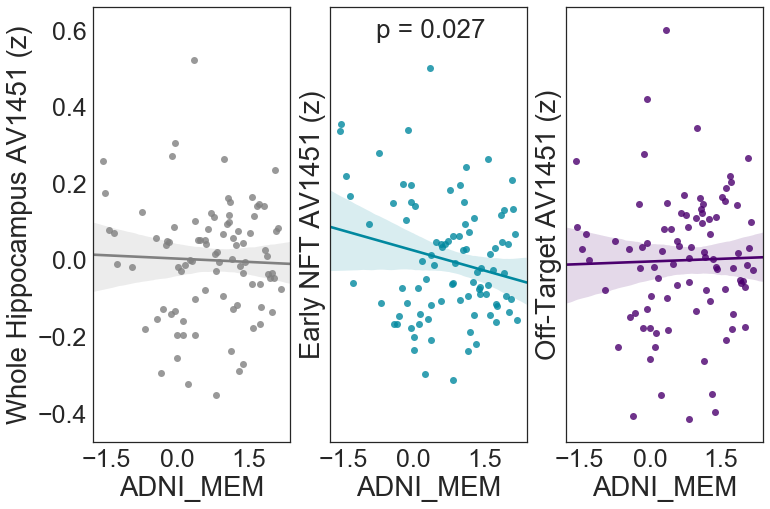

In [245]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.regplot('ADNI_MEM','AV1451 Whole Hippocampus',data=jdf, ax=ax1, color='gray')
sns.regplot('ADNI_MEM','AV1451 Early NFT',data=jdf, ax=ax2, color=sns.xkcd_rgb["teal blue"])
sns.regplot('ADNI_MEM','AV1451 Off-Target',data=jdf, ax=ax3, color=sns.xkcd_rgb["royal purple"])
for ax in [ax1,ax2,ax3]:
    ax.set_xticks([-1.5, 0, 1.5])
ax1.set_ylabel('Whole Hippocampus AV1451 (z)')
ax2.set_ylabel('Early NFT AV1451 (z)')
ax3.set_ylabel('Off-Target AV1451 (z)')
ax2.text(-0.8, 0.58,'p = 0.027', fontsize=26)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/memory.eps')
plt.show()

In [95]:
sns.regplot?

//anaconda/envs/py3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


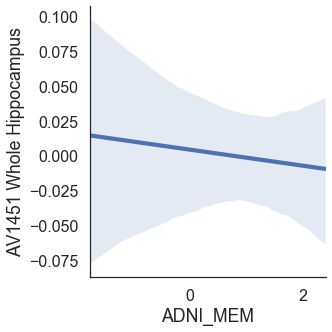

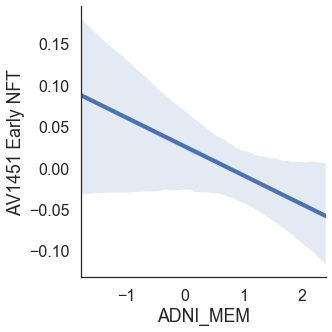

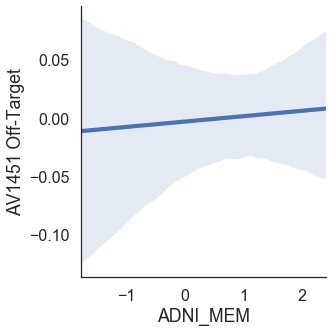

In [128]:
plt.close()
sns.lmplot('ADNI_MEM','AV1451 Whole Hippocampus', data = jdf, markers = "None")
sns.lmplot('ADNI_MEM','AV1451 Early NFT', markers='None', data = jdf)
sns.lmplot('ADNI_MEM','AV1451 Off-Target', markers='None', data = jdf)
plt.legend()
plt.show()

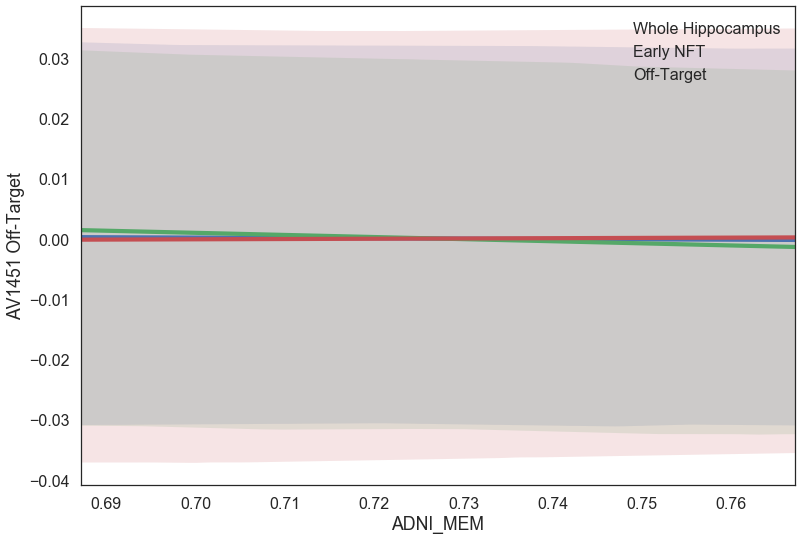

In [129]:
plt.close()
sns.regplot(jdf['ADNI_MEM'],jdf['AV1451 Whole Hippocampus'], marker = 'None', label='Whole Hippocampus')
sns.regplot(jdf['ADNI_MEM'],jdf['AV1451 Early NFT'], marker='None', label = 'Early NFT')
sns.regplot(jdf['ADNI_MEM'],jdf['AV1451 Off-Target'], marker='None', label = 'Off-Target')
plt.legend()
plt.show()

In [83]:
braak1 = jdf[jdf.columns[14:20]]
braak2 = jdf[['dkt_Braak_new_atlas_1','new_hipp_tau_cons'] + jdf.columns[16:20].tolist()]

In [88]:
braak1['total_tau'] = braak1.sum(axis=1)
braak2['total_tau'] = braak2.sum(axis=1)

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [110]:
sns.heatmap?

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


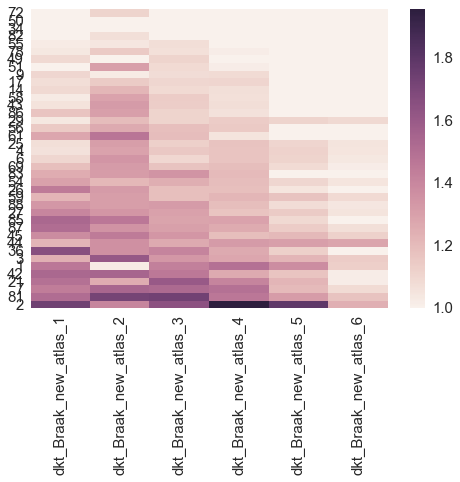

In [111]:
plt.close()
sns.heatmap(braak1.sort_values('total_tau')[jdf.av45==1][braak1.columns[:-1]],
           vmin=1)
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


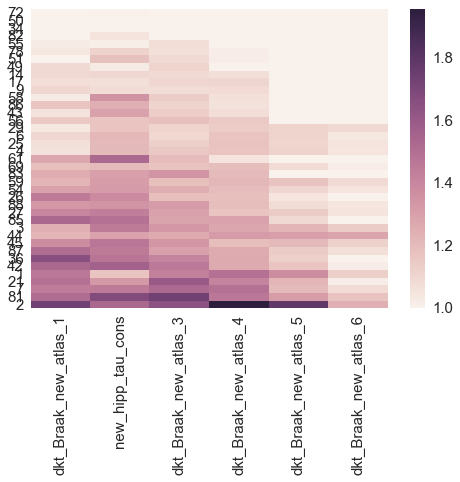

In [112]:
plt.close()
sns.heatmap(braak2.sort_values('total_tau')[jdf.av45==1][braak2.columns[:-1]],vmin=1)
plt.show()

In [107]:
b1bin = pandas.DataFrame(braak1,copy=True)
b2bin = pandas.DataFrame(braak2,copy=True)
for sub in b1bin.index:
    for col in b1bin.columns:
        if b1bin.ix[sub,col] < 1.4:
            b1bin.ix[sub,col] = 0
for sub in b2bin.index:
    for col in b2bin.columns:
        if b2bin.ix[sub,col] < 1.4:
            b2bin.ix[sub,col] = 0

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


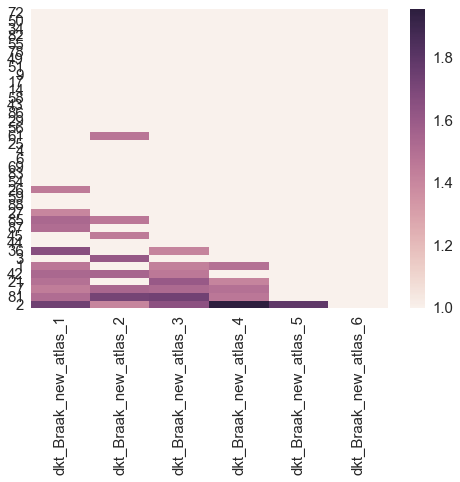

In [127]:
plt.close()
sns.heatmap(b1bin.sort_values('total_tau')[jdf.av45==1][b1bin.columns[:-1]], vmin=1)
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


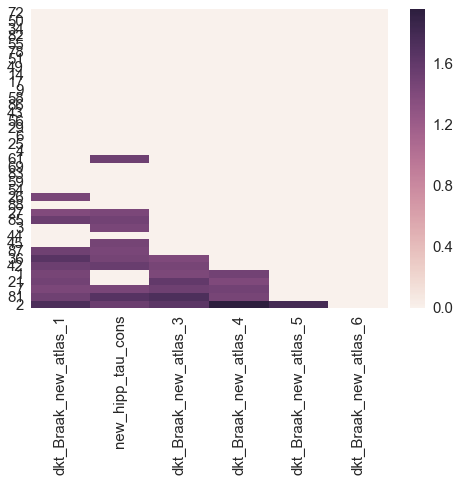

In [109]:
plt.close()
sns.heatmap(b2bin.sort_values('total_tau')[jdf.av45==1][b2bin.columns[:-1]])
plt.show()

In [117]:
zb1 = (braak1 - braak1.mean()) / braak1.std()
zb2 = (braak2 - braak2.mean()) / braak2.std()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


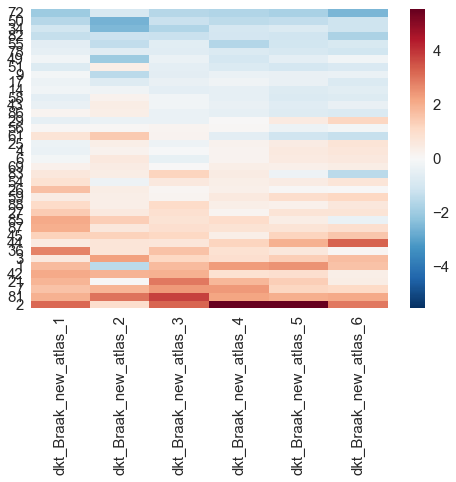

In [124]:
plt.close()
sns.heatmap(zb1.sort_values('total_tau')[jdf.av45==1][zb1.columns[:-1]])
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


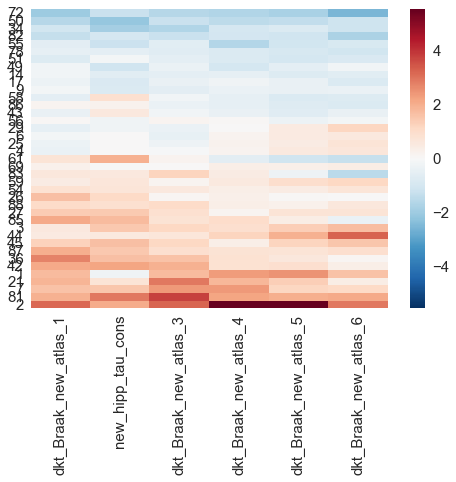

In [125]:
plt.close()
sns.heatmap(zb2.sort_values('total_tau')[jdf.av45==1][zb2.columns[:-1]])
plt.show()

## NOW ADDING MORE SUBBIES

In [30]:
bt = pandas.read_csv('/Users/jakevogel/Science/tau/big_tau.csv')
bt = bt.loc[bt.visit == 1]
bt.shape

(258, 41)

In [31]:
bt.index = bt.ID

In [37]:
bt.head()

,ID,visit,scandate,1_OffTarget,2_Frontal,3_Temporal,4_Temporoparietal,5_Sensory,Hipp_OffTarget,Hipp_EarlyTau,...,ICV,DX_fill,av45_status,reference_date,time_difference_days,whole_hippocampus_AV1451,av45_date,av45_time_difference_days,ADNI_MEM,ADNI_EF
ID,,,,,,,,,,,,,,,,,,,,,
002_S_0413,002_S_0413,1.0,2017-06-21,0.556860,0.755623,0.840567,0.849258,0.784010,0.993596,0.765412,...,1602970.0,NL,0.0,2017-06-15,6.0,0.901752,2017-06-15,6.0,1.085,1.982
002_S_1155,002_S_1155,1.0,2017-04-24,0.894891,1.092542,1.174600,1.123418,1.053782,1.112060,1.049716,...,NaN,MCI,0.0,2017-04-20,4.0,1.086967,2017-04-20,4.0,0.396,1.444
002_S_1261,002_S_1261,1.0,2017-03-15,0.799323,1.041872,1.210508,1.140991,1.088301,1.414064,1.268073,...,1490670.0,MCI,1.0,2017-03-14,1.0,1.355302,2017-03-14,1.0,0.001,-0.116
002_S_1280,002_S_1280,1.0,2017-03-13,0.900107,1.001559,1.195115,1.245342,1.135461,1.310057,1.231244,...,NaN,NL,1.0,2017-03-02,11.0,1.278335,2017-03-02,11.0,-0.277,0.868
002_S_4213,002_S_4213,1.0,2017-08-17,0.510890,0.772613,0.884422,0.885704,0.835541,0.908119,0.802743,...,NaN,NL,0.0,2017-08-10,7.0,0.865705,2015-09-30,687.0,0.918,1.065


In [38]:
bt.columns

Index(['ID', 'visit', 'scandate', '1_OffTarget', '2_Frontal', '3_Temporal',
       '4_Temporoparietal', '5_Sensory', 'Hipp_OffTarget', 'Hipp_EarlyTau',
       'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'AV45', 'CDRSB', 'ADAS11',
       'ADAS13', 'MMSE', 'RAVLT_immediate', 'RAVLT_learning',
       'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ', 'MOCA',
       'EcogSPTotal', 'EcogPtTotal', 'ICV', 'DX_fill', 'av45_status',
       'reference_date', 'time_difference_days', 'whole_hippocampus_AV1451',
       'av45_date', 'av45_time_difference_days', 'ADNI_MEM', 'ADNI_EF'],
      dtype='object')

In [41]:
ncols = bt.columns[:8].tolist() + ['AV1451 Off-Target','AV1451 Early NFT'
                           ] + bt.columns[10:-5].tolist() + ['AV1451 Whole Hippocampus'
                                                            ] + bt.columns[-4:].tolist()

In [42]:
len(ncols) == len(bt.columns)

True

In [43]:
list(zip(ncols,bt.columns))

[('ID', 'ID'),
 ('visit', 'visit'),
 ('scandate', 'scandate'),
 ('1_OffTarget', '1_OffTarget'),
 ('2_Frontal', '2_Frontal'),
 ('3_Temporal', '3_Temporal'),
 ('4_Temporoparietal', '4_Temporoparietal'),
 ('5_Sensory', '5_Sensory'),
 ('AV1451 Off-Target', 'Hipp_OffTarget'),
 ('AV1451 Early NFT', 'Hipp_EarlyTau'),
 ('AGE', 'AGE'),
 ('PTGENDER', 'PTGENDER'),
 ('PTEDUCAT', 'PTEDUCAT'),
 ('APOE4', 'APOE4'),
 ('AV45', 'AV45'),
 ('CDRSB', 'CDRSB'),
 ('ADAS11', 'ADAS11'),
 ('ADAS13', 'ADAS13'),
 ('MMSE', 'MMSE'),
 ('RAVLT_immediate', 'RAVLT_immediate'),
 ('RAVLT_learning', 'RAVLT_learning'),
 ('RAVLT_forgetting', 'RAVLT_forgetting'),
 ('RAVLT_perc_forgetting', 'RAVLT_perc_forgetting'),
 ('FAQ', 'FAQ'),
 ('MOCA', 'MOCA'),
 ('EcogSPTotal', 'EcogSPTotal'),
 ('EcogPtTotal', 'EcogPtTotal'),
 ('ICV', 'ICV'),
 ('DX_fill', 'DX_fill'),
 ('av45_status', 'av45_status'),
 ('reference_date', 'reference_date'),
 ('time_difference_days', 'time_difference_days'),
 ('AV1451 Whole Hippocampus', 'whole_hippocampus

In [44]:
bt.columns = ncols

In [45]:
whF, whp = stats.f_oneway(bt[bt.DX_fill == 'NL']['AV1451 Whole Hippocampus'],
              bt[bt.DX_fill == 'MCI']['AV1451 Whole Hippocampus'],
              bt[bt.DX_fill == 'Dementia']['AV1451 Whole Hippocampus'])
print('whole hippocampus:',whF,whp)

etF, etp = stats.f_oneway(bt[bt.DX_fill == 'NL']['AV1451 Early NFT'],
              bt[bt.DX_fill == 'MCI']['AV1451 Early NFT'],
              bt[bt.DX_fill == 'Dementia']['AV1451 Early NFT'])
print('Early NFT:',etF,etp)

otF, otp = stats.f_oneway(bt[bt.DX_fill == 'NL']['AV1451 Off-Target'],
              bt[bt.DX_fill == 'MCI']['AV1451 Off-Target'],
              bt[bt.DX_fill == 'Dementia']['AV1451 Off-Target'])
print('Off-Target:',otF,otp)

whole hippocampus: 7.16745392839 0.000936614282763
Early NFT: 17.7999723425 5.80354391678e-08
Off-Target: 2.24022793415 0.108525012255


In [46]:
bt.loc[:,'DX'] = ['AD' if x == 'Dementia' else x for x in bt.DX_fill]

In [47]:
print(len(bt[bt.DX=='NL']))
print(len(bt[bt.DX=='MCI']))
print(len(bt[bt.DX=='AD']))

143
88
27


In [15]:
143+88+27

258

In [48]:
bt.shape

(258, 38)

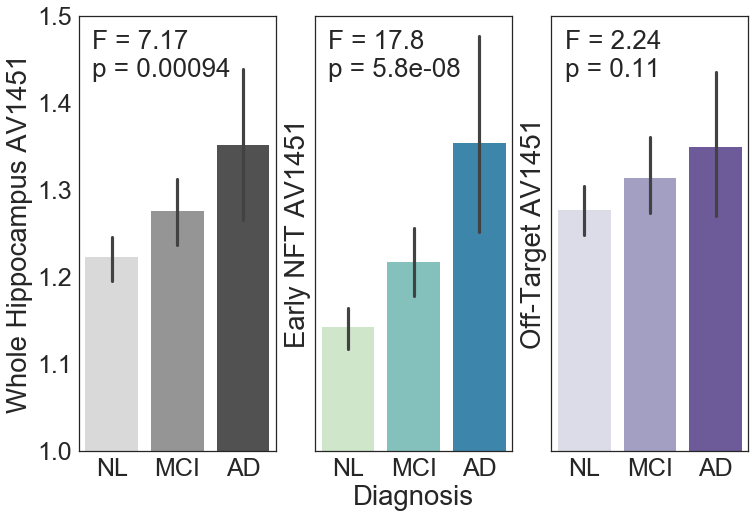

In [50]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('DX','AV1451 Whole Hippocampus',data=bt, 
            order = ['NL', 'MCI', 'AD'], ax=ax1, palette='Greys')
sns.barplot('DX','AV1451 Early NFT',data=bt, 
            order = ['NL', 'MCI', 'AD'], ax=ax2, palette='GnBu')
sns.barplot('DX','AV1451 Off-Target',data=bt, 
            order = ['NL', 'MCI', 'AD'], ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
ax1.set_xlabel('')
ax2.set_xlabel('Diagnosis')
ax3.set_xlabel('')
#plt.yticks([-0.1, 0, 0.1, 0.2])
ax1.text(-0.3, 1.43,'F = %s\np = %s'%(float('%.3g' % whF),float('%.2g' % whp)), fontsize=26)
ax2.text(-0.3, 1.43,'F = %s\np = %s'%(float('%.3g' % etF),float('%.2g' % etp)), fontsize=26)
ax3.text(-0.3, 1.43,'F = %s\np = %s'%(float('%.3g' % otF),float('%.2g' % otp)), fontsize=26)
plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/DX_n258.pdf')
plt.show()

In [52]:
wht, whtp = stats.ttest_ind(bt[bt.av45_status == 0]['AV1451 Whole Hippocampus'].dropna(),
              bt[bt.av45_status == 1]['AV1451 Whole Hippocampus'].dropna())
print('whole hippocampus:',wht,whtp)

ett, ettp = stats.ttest_ind(bt[bt.av45_status == 0]['AV1451 Early NFT'].dropna(),
              bt[bt.av45_status == 1]['AV1451 Early NFT'].dropna())
print('Early NFT:',ett, ettp)

ott, ottp = stats.ttest_ind(bt[bt.av45_status == 0]['AV1451 Off-Target'].dropna(),
              bt[bt.av45_status == 1]['AV1451 Off-Target'].dropna())
print('Off-Target:',ott, ottp)

aneg = len(bt[bt.av45_status == 0]['AV1451 Whole Hippocampus'].dropna())
apos = len(bt[bt.av45_status == 1]['AV1451 Whole Hippocampus'].dropna())
print('n av45- = %s, n av45+ = %s, total = %s'%(aneg,apos,(aneg+apos)))

whole hippocampus: -3.88475079345 0.00013553247541
Early NFT: -6.14527422174 3.70289506786e-09
Off-Target: -2.12681440801 0.0345491684323
n av45- = 123, n av45+ = 99, total = 222


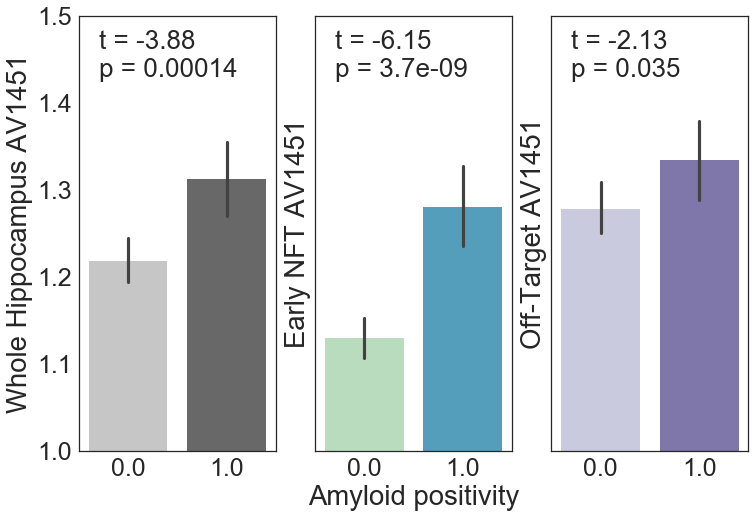

In [53]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.barplot('av45_status','AV1451 Whole Hippocampus',data=bt, ax=ax1, palette='Greys')
sns.barplot('av45_status','AV1451 Early NFT',data=bt, ax=ax2, palette='GnBu')
sns.barplot('av45_status','AV1451 Off-Target',data=bt, ax=ax3, palette='Purples')
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
ax1.set_xlabel('')
ax2.set_xlabel('Amyloid positivity')
ax3.set_xlabel('')
ax1.text(-0.3, 1.43,'t = %s\np = %s'%(float('%.3g' % wht),float('%.2g' % whtp)), fontsize=26)
ax2.text(-0.3, 1.43,'t = %s\np = %s'%(float('%.3g' % ett),float('%.2g' % ettp)), fontsize=26)
ax3.text(-0.3, 1.43,'t = %s\np = %s'%(float('%.3g' % ott),float('%.2g' % ottp)), fontsize=26)
plt.ylim(1.0, 1.5)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/amyloid_n222.pdf')
plt.show()

In [54]:
mcols = ['AV1451 Whole Hippocampus','AV1451 Early NFT','AV1451 Off-Target','MMSE']
mmsedf = bt[mcols].dropna()

whmr,whmp = stats.pearsonr(mmsedf['AV1451 Whole Hippocampus'], mmsedf['MMSE'])
print('whole hippocampus:',whmr,whmp)

etmr,etmp = stats.pearsonr(mmsedf['AV1451 Early NFT'], mmsedf['MMSE'])
print('Early NFT:',etmr,etmp)

otmr, otmp = stats.pearsonr(mmsedf['AV1451 Off-Target'], mmsedf['MMSE'])
print('Off-Target:',otmr, otmp)

print('n = ',len(mmsedf))

whole hippocampus: -0.224382122786 0.00097504876123
Early NFT: -0.372483846897 2.0547845971e-08
Off-Target: -0.103660413224 0.131545058615
n =  213


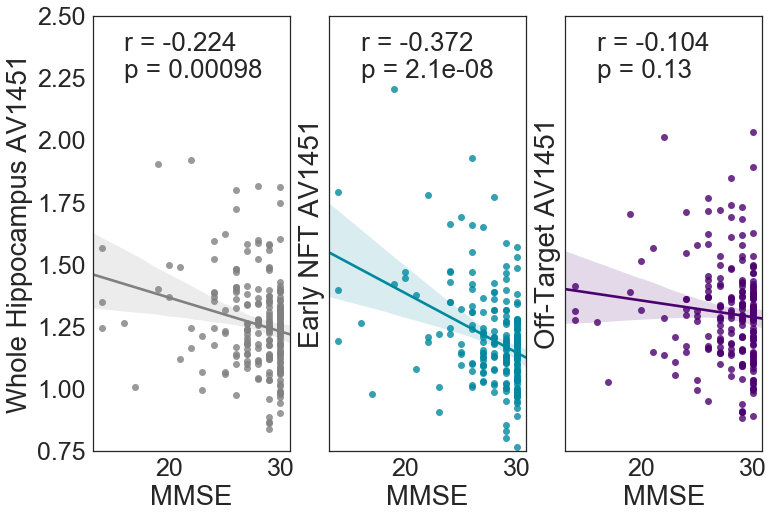

In [57]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.regplot('MMSE','AV1451 Whole Hippocampus',data=mmsedf, ax=ax1, color='gray')
sns.regplot('MMSE','AV1451 Early NFT',data=mmsedf, ax=ax2, color=sns.xkcd_rgb["teal blue"])
sns.regplot('MMSE','AV1451 Off-Target',data=mmsedf, ax=ax3, color=sns.xkcd_rgb["royal purple"])
#for ax in [ax1,ax2,ax3]:
#    ax.set_xticks([-1.5, 0, 1.5])
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
plt.ylim(0.75, 2.5)
ax1.text(16, 2.25,'r = %s\np = %s'%(float('%.3g' % whmr),float('%.2g' % whmp)), fontsize=26)
ax2.text(16, 2.25,'r = %s\np = %s'%(float('%.3g' % etmr),float('%.2g' % etmp)), fontsize=26)
ax3.text(16, 2.25,'r = %s\np = %s'%(float('%.3g' % otmr),float('%.2g' % otmp)), fontsize=26)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/MMSE_n213.pdf')
plt.show()

In [60]:
ccols = ['AV1451 Whole Hippocampus','AV1451 Early NFT','AV1451 Off-Target','ADNI_MEM']
cogdf = bt[ccols].dropna()

whcr,whcp = stats.pearsonr(cogdf['AV1451 Whole Hippocampus'], cogdf['ADNI_MEM'])
print('whole hippocampus:',whcr,whcp)

etcr,etcp = stats.pearsonr(cogdf['AV1451 Early NFT'], cogdf['ADNI_MEM'])
print('Early NFT:',etcr,etcp)

otcr, otcp = stats.pearsonr(cogdf['AV1451 Off-Target'], cogdf['ADNI_MEM'])
print('Off-Target:',otcr, otcp)

print('n = ',len(cogdf))

whole hippocampus: -0.171023740544 0.00705806252303
Early NFT: -0.275799961083 1.09177174894e-05
Off-Target: -0.0848053650524 0.184028002539
n =  247


In [211]:
bt.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1', 'ID',
       'visit', 'scandate', '1_OffTarget', '2_Frontal', '3_Temporal',
       '4_Temporoparietal', 'AV1451 Off-Target', 'AV1451 Early NFT',
       'Hipp_EarlyTau', 'AGE', 'PTGENDER', 'PTEDUCAT', 'APOE4', 'AV45',
       'CDRSB', 'ADAS11', 'ADAS13', 'MMSE', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'RAVLT_perc_forgetting', 'FAQ',
       'MOCA', 'EcogSPTotal', 'EcogPtTotal', 'ICV', 'DX_fill', 'av45_status',
       'reference_date', 'time_difference_days', 'AV1451 Whole Hippocampus',
       'av45_date', 'av45_time_difference_days', 'ADNI_MEM', 'ADNI_EF', 'DX'],
      dtype='object')

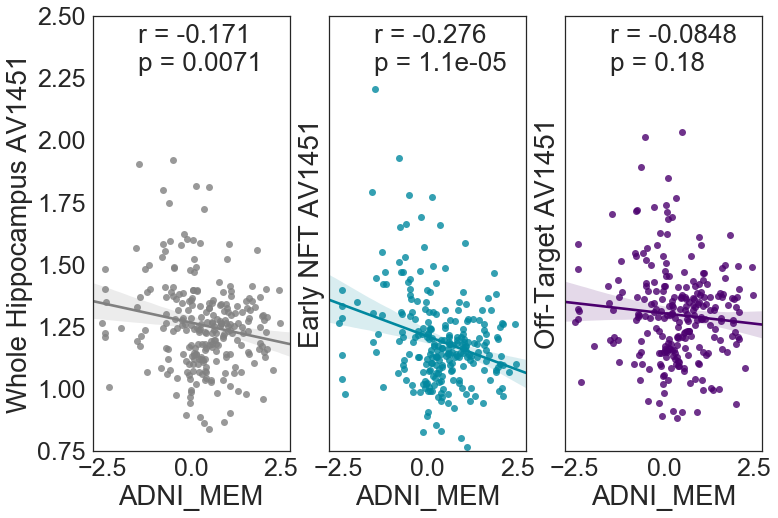

In [67]:
plt.close()
sns.set(font_scale=2.5)
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=[12,8])
sns.regplot('ADNI_MEM','AV1451 Whole Hippocampus',data=cogdf, ax=ax1, color='gray')
sns.regplot('ADNI_MEM','AV1451 Early NFT',data=cogdf, ax=ax2, color=sns.xkcd_rgb["teal blue"])
sns.regplot('ADNI_MEM','AV1451 Off-Target',data=cogdf, ax=ax3, color=sns.xkcd_rgb["royal purple"])
#for ax in [ax1,ax2,ax3]:
#    ax.set_xticks([-1.5, 0, 1.5])
ax1.set_ylabel('Whole Hippocampus AV1451')
ax2.set_ylabel('Early NFT AV1451')
ax3.set_ylabel('Off-Target AV1451')
plt.ylim(0.75, 2.5)
ax1.text(-1.5, 2.28,'r = %s\np = %s'%(float('%.3g' % whcr),float('%.2g' % whcp)), fontsize=26)
ax2.text(-1.5, 2.28,'r = %s\np = %s'%(float('%.3g' % etcr),float('%.2g' % etcp)), fontsize=26)
ax3.text(-1.5, 2.28,'r = %s\np = %s'%(float('%.3g' % otcr),float('%.2g' % otcp)), fontsize=26)
fig.savefig('/Users/jakevogel/Dropbox/JAKE - AV1451 Clustering/Hippocampus_Project/HBM/EM_n247.pdf')
plt.show()

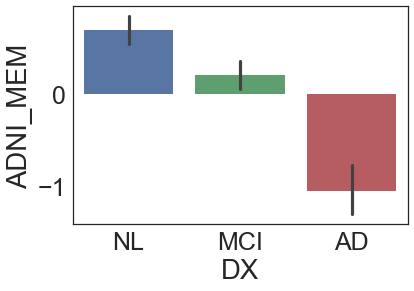

In [209]:
checkdf = bt[['DX','ADNI_MEM']].dropna()
plt.close()
sns.barplot('DX','ADNI_MEM',data=checkdf)
plt.show()

In [86]:
lmdf = pandas.DataFrame(pandas.concat([bt['AV1451 Whole Hippocampus'], 
                      bt['AV1451 Early NFT'],
                     bt['AV1451 Off-Target']]))
lmdf.columns = ['tau_signal']

In [87]:
lmdf.loc[:,'WH'] = [1] * len(bt['AV1451 Whole Hippocampus']) + [0] * (len(bt['AV1451 Whole Hippocampus'])*2)
lmdf.loc[:,'ET'] = [0] * len(bt['AV1451 Whole Hippocampus']) + [1] * len(bt['AV1451 Whole Hippocampus']) + [0] * len(bt['AV1451 Whole Hippocampus'])
lmdf.loc[:,'OT'] = [0] * (len(bt['AV1451 Whole Hippocampus'])*2) + [1] * len(bt['AV1451 Whole Hippocampus'])

In [91]:
lmdf.loc[:,'ID'] = lmdf.index
lmdf.index = range(len(lmdf.index))

In [101]:
lmdf.loc[:,'MMSE'] = bt.MMSE.tolist() + bt.MMSE.tolist() + bt.MMSE.tolist()

In [107]:
lmdf.loc[:,'measurement'] = [1] * len(bt['AV1451 Whole Hippocampus']) + [2] * len(bt['AV1451 Whole Hippocampus']) + [3] * len(bt['AV1451 Whole Hippocampus'])

In [117]:
smf.mixedlm('MMSE ~ tau_signal + ET + OT', lmdf.dropna(), groups=lmdf.dropna()['ID']).fit().summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: MMSE     
No. Observations: 639     Method:             REML     
No. Groups:       213     Scale:              0.0000   
Min. group size:  3       Likelihood:         3324.1513
Max. group size:  3       Converged:          Yes      
Mean group size:  3.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   27.756    0.123 226.487 0.000 27.516 27.996
tau_signal  -0.000    0.000  -0.000 1.000 -0.000  0.000
ET          -0.000    0.000  -0.000 1.000 -0.000  0.000
OT           0.000    0.000   0.000 1.000 -0.000  0.000
groups RE    3.199 8610.977                            
=======================================================

"""